In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# import scipy.stats as stats
# import statsmodels.api as sm
import miceforest as mf
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error


from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


from tqdm import tqdm
import os



from tensorflow.keras.layers import Lambda, Dropout, Concatenate
from tensorflow.keras import losses
from tensorflow.keras import backend as K
from sklearn.metrics import mean_absolute_error, mean_squared_error as sk_mse




from sklearn.neural_network import MLPRegressor
from sklearn.impute import SimpleImputer
import warnings
import time
warnings.filterwarnings('ignore')


from sklearn.base import BaseEstimator, TransformerMixin

import random
from sklearn.model_selection import KFold
from scipy.stats import ks_2samp

2025-04-01 11:45:05.484081: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-01 11:45:05.668837: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-01 11:45:05.729772: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-01 11:45:06.183884: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-01 11:45:11.639219: W tensorflow/compiler/tf2

# Data Import

In [2]:
# Read the CSV file - linked file 
file_path = "Merged_TSQIC_REDCap_ACCESS.xlsx" 
df = pd.read_excel(file_path)
df

,id,operation_date,redcap_event_name,ComplicationDate,dob,qol_date,age_diagnosis,gender,overall_primary_tumour,overall_regional_ln,...,a_e5,a_e6,a_e7,a_c6,a_c2,a_act11,readmission_30d,postop_comp,los,DischargeDate
0,1,NaT,baseline_arm_1,NaT,2049-08-04,NaT,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2012-04-27
1,1,2011-08-26,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-08-26
2,1,2010-02-20,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,2010-03-08
3,1,2009-02-25,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,2009-03-05
4,1,2008-02-22,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,2008-03-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18182,1770,NaT,preoperative_arm_1,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
18183,1770,NaT,preoperative_arm_1,NaT,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
18184,1770,NaT,preoperative_arm_1,NaT,NaT,2025-02-24,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,3.0,3.0,NaN,NaN,NaN,NaT
18185,1770,NaT,baseline_arm_1,NaT,1982-10-12,NaT,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [3]:
df.columns

Index(['id', 'operation_date', 'redcap_event_name', 'ComplicationDate', 'dob',
       'qol_date', 'age_diagnosis', 'gender', 'overall_primary_tumour',
       'overall_regional_ln', 'overall_distant_metastasis', 'neotx___notx',
       'neotx___chemo', 'neotx___rads', 'neotx___chemorads', 'neotx___immuno',
       'neotx___other', 'procedure123456', 'expectation_treatment',
       'path_esoph_primtumour', 'path_esoph_regionalln',
       'path_esoph_distantmetast', 'gp1', 'gp2', 'gp3', 'gp4', 'gp5', 'gp6',
       'gp7', 'gs1', 'gs2', 'gs3', 'gs4', 'gs5', 'gs6', 'gs7', 'ge1', 'ge2',
       'ge3', 'ge4', 'ge5', 'ge6', 'gf1', 'gf2', 'gf3', 'gf4', 'gf5', 'gf6',
       'gf7', 'a_hn1', 'a_hn2', 'a_hn3', 'a_hn4', 'a_hn5', 'a_hn7', 'a_hn10',
       'a_e1', 'a_e2', 'a_e3', 'a_e4', 'a_e5', 'a_e6', 'a_e7', 'a_c6', 'a_c2',
       'a_act11', 'readmission_30d', 'postop_comp', 'los', 'DischargeDate'],
      dtype='object')

In [4]:
#drop dates
df = df.drop(columns=["operation_date", "ComplicationDate", "dob", "qol_date", "DischargeDate"])
df.columns

Index(['id', 'redcap_event_name', 'age_diagnosis', 'gender',
       'overall_primary_tumour', 'overall_regional_ln',
       'overall_distant_metastasis', 'neotx___notx', 'neotx___chemo',
       'neotx___rads', 'neotx___chemorads', 'neotx___immuno', 'neotx___other',
       'procedure123456', 'expectation_treatment', 'path_esoph_primtumour',
       'path_esoph_regionalln', 'path_esoph_distantmetast', 'gp1', 'gp2',
       'gp3', 'gp4', 'gp5', 'gp6', 'gp7', 'gs1', 'gs2', 'gs3', 'gs4', 'gs5',
       'gs6', 'gs7', 'ge1', 'ge2', 'ge3', 'ge4', 'ge5', 'ge6', 'gf1', 'gf2',
       'gf3', 'gf4', 'gf5', 'gf6', 'gf7', 'a_hn1', 'a_hn2', 'a_hn3', 'a_hn4',
       'a_hn5', 'a_hn7', 'a_hn10', 'a_e1', 'a_e2', 'a_e3', 'a_e4', 'a_e5',
       'a_e6', 'a_e7', 'a_c6', 'a_c2', 'a_act11', 'readmission_30d',
       'postop_comp', 'los'],
      dtype='object')

In [5]:
# Step 1: Preprocess categorical variables
# Low-cardinality variables: Convert to category dtype
low_cardinality_cols = [
    'postop_comp', 'readmission_30d', 'gender', 'neotx___notx', 'neotx___chemo',
    'neotx___rads', 'neotx___chemorads', 'neotx___immuno', 'neotx___other',
    'expectation_treatment'
]
for col in low_cardinality_cols:
    df[col] = df[col].astype('category')

# High-cardinality variables: Label encode and convert to category
le_redcap = LabelEncoder()
df['redcap_event_name'] = df['redcap_event_name'].astype(str)  # Convert to string to handle NaN
df['redcap_event_name'] = le_redcap.fit_transform(df['redcap_event_name'])
df['redcap_event_name'] = df['redcap_event_name'].astype('category')

# procedure123456 is already numerical but should be treated as categorical
df['procedure123456'] = df['procedure123456'].astype('category')
df

,id,redcap_event_name,age_diagnosis,gender,overall_primary_tumour,overall_regional_ln,overall_distant_metastasis,neotx___notx,neotx___chemo,neotx___rads,...,a_e4,a_e5,a_e6,a_e7,a_c6,a_c2,a_act11,readmission_30d,postop_comp,los
0,1,8,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,1,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0
3,1,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
4,1,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18182,1770,10,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18183,1770,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18184,1770,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,3.0,3.0,NaN,NaN,NaN
18185,1770,8,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Step 2: Preprocess numerical and ordinal columns
# True numerical columns: Ensure float/int dtype
numerical_cols = ['los', 'age_diagnosis']
for col in numerical_cols:
    df[col] = df[col].astype(float)

#Step 3
# Ordinal columns: Treat as numerical (already float)
ordinal_cols = (
    [f"gp{i}" for i in range(1, 8)] + [f"gs{i}" for i in range(1, 8)] +
    [f"ge{i}" for i in range(1, 7)] + [f"gf{i}" for i in range(1, 8)] +
    [f"a_hn{i}" for i in range(1, 6)] + ["a_hn7", "a_hn10"] +
    [f"a_e{i}" for i in range(1, 8)] + ["a_c6", "a_c2", "a_act11"]
)
# Subset for this example
ordinal_cols = [col for col in ordinal_cols if col in df.columns]
for col in ordinal_cols:
    df[col] = df[col].astype(float)

#Step 4
# Categorical-like columns: Treat as categorical
categorical_like_cols = [
    'overall_primary_tumour', 'overall_regional_ln', 'overall_distant_metastasis', 
    'path_esoph_primtumour', 'path_esoph_regionalln', 'path_esoph_distantmetast'
]
for col in categorical_like_cols:
    df[col] = df[col].astype(str)  # Convert to string to handle mixed types
    df[col] = df[col].astype('category')
df

,id,redcap_event_name,age_diagnosis,gender,overall_primary_tumour,overall_regional_ln,overall_distant_metastasis,neotx___notx,neotx___chemo,neotx___rads,...,a_e4,a_e5,a_e6,a_e7,a_c6,a_c2,a_act11,readmission_30d,postop_comp,los
0,1,8,NaN,1.0,nan,nan,nan,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,1,9,NaN,NaN,nan,nan,nan,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,9,NaN,NaN,nan,nan,nan,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0
3,1,9,NaN,NaN,nan,nan,nan,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
4,1,9,NaN,NaN,nan,nan,nan,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18182,1770,10,NaN,NaN,nan,nan,nan,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18183,1770,10,NaN,NaN,nan,nan,nan,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18184,1770,10,NaN,NaN,nan,nan,nan,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,3.0,3.0,NaN,NaN,NaN
18185,1770,8,NaN,1.0,nan,nan,nan,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Model - MICE

In [7]:
def apply_mice_imputation(df, columns_to_impute, validation_df=None, validation_masks=None, original_values=None):
    """
    Apply MICE imputation using miceforest package
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Data with missing values
    columns_to_impute : list
        List of column names to impute
    validation_df : pandas.DataFrame, optional
        Validation dataset with artificially missing values
    validation_masks : dict, optional
        Dictionary of masks for validation data
    original_values : dict, optional
        Dictionary of original values for validation
        
    Returns:
    --------
    imputed_df : pandas.DataFrame
        Data with imputed values
    validation_results : dict, optional
        Validation results if validation data provided
    """

    # Set threads for LightGBM
    os.environ['OMP_NUM_THREADS'] = '10'
    
    # Initialize the imputation kernel
    kernel = mf.ImputationKernel(
        df,
        datasets=1,
        variable_schema={
            col: [c for c in df.columns if c != col] for col in columns_to_impute
        },
        random_state=42  # Using fixed seed for reproducibility, can be parameterized
    )
    
    # Run imputation
    for _ in tqdm(range(5), desc="MICE Imputation"):
        kernel.mice(
            iterations=1,
            verbose=False,
            num_boost_round=80,
            max_depth=10,
            num_threads=10
        )
    
    # Get imputed data
    imputed_df = kernel.complete_data(0)
    
    # Check if there's a label encoder for redcap_event_name that needs inverse transformation
    if 'redcap_event_name' in imputed_df.columns:
        try:
            # This is optional - only execute if le_redcap exists in the global scope
            if 'le_redcap' in globals():
                # Check if we're dealing with numeric values (could be int or float)
                if pd.api.types.is_numeric_dtype(imputed_df['redcap_event_name']) or \
                   (hasattr(imputed_df['redcap_event_name'], 'cat') and pd.api.types.is_numeric_dtype(imputed_df['redcap_event_name'].cat.categories)):
                    imputed_df['redcap_event_name'] = globals()['le_redcap'].inverse_transform(imputed_df['redcap_event_name'].astype(int))
        except Exception as e:
            print(f"Warning: Could not inverse transform redcap_event_name: {e}")
    
    # Validate if validation data provided
    validation_results = None
    if validation_df is not None and validation_masks is not None and original_values is not None:
        validation_results = {}
        
        # Compare imputed values to real values
        for col in columns_to_impute:
            # Get indices where values were artificially set to NaN
            mask = validation_masks[col] & validation_df[col].isna()
            
            if mask.sum() == 0:
                validation_results[col] = {
                    'error': "No artificially missing values"
                }
                continue
                
            real_vals = original_values[col][mask]
            imputed_vals = imputed_df[col][mask]
            
            # Calculate MAE and RMSE
            mae = mean_absolute_error(real_vals, imputed_vals)
            rmse = np.sqrt(mean_squared_error(real_vals, imputed_vals))
            
            validation_results[col] = {
                'mae': mae,
                'rmse': rmse,
                'real_distribution': real_vals.describe(),
                'imputed_distribution': imputed_vals.describe()
            }
    
    return imputed_df, validation_results

In [8]:
columns_to_impute = ['ge1', 'ge2', 'ge3', 'ge4', 'ge5', 'ge6']
imputed_df_mice, validation_results_mice = apply_mice_imputation(df, columns_to_impute)

MICE Imputation: 100%|██████████| 5/5 [00:33<00:00,  6.76s/it]


# Model - Generative Adversarial Imputation networks (GAIN)

In [11]:
#https://github.com/dongdongdongdwn/GAIN-Dovey/blob/master/GAIN%20code
#https://bmcmedresmethodol.biomedcentral.com/articles/10.1186/s12874-021-01272-3#Abs1 

In [12]:

# Disable eager execution for TensorFlow 2.x compatibility
tf.compat.v1.disable_eager_execution()

class OriginalGAIN:
    """
    Original GAIN (Generative Adversarial Imputation Networks) implementation
    Refactored from the original implementation and adapted to work with modern TensorFlow
    Now with better handling of mixed data types, NaN prevention, and numerical stability improvements
    """
    
    def __init__(self, 
                 batch_size=64,  # Reduced from 200
                 hint_rate=0.1,
                 alpha=10.0,
                 beta=0.5,
                 gamma=5.0,
                 n_hidden1=64,
                 n_hidden2=64,
                 iterations=3000,
                 learning_rate=0.0001,  # Reduced from 0.001
                 clip_value=1.0,  # For gradient clipping
                 verbose=True):
        """
        Initialize GAIN model with original paper's hyperparameters
        """
        self.batch_size = batch_size
        self.hint_rate = hint_rate
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.n_hidden1 = n_hidden1
        self.n_hidden2 = n_hidden2
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.clip_value = clip_value
        self.verbose = verbose
        
        # TensorFlow settings
        self.sess = None
        self.graph = None
        
        # Data preprocessing attributes
        self.encoders = {}
        self.is_categorical = {}
        self.data_min = None
        self.data_max = None
        self.data_range = None
        self.mean_values = None
        self.categorical = None
        self.continuous = None
        
    def _setup_variables(self, dim):
        """Set up TensorFlow variables"""
        with tf.compat.v1.variable_scope('generator'):
            self.G_W1 = tf.compat.v1.get_variable('G_W1', [dim * 2, self.n_hidden1], 
                                       initializer=tf.compat.v1.keras.initializers.glorot_normal())
            self.G_b1 = tf.compat.v1.get_variable('G_b1', [self.n_hidden1], initializer=tf.compat.v1.zeros_initializer())
            
            self.G_W2 = tf.compat.v1.get_variable('G_W2', [self.n_hidden1, self.n_hidden2], 
                                       initializer=tf.compat.v1.keras.initializers.glorot_normal())
            self.G_b2 = tf.compat.v1.get_variable('G_b2', [self.n_hidden2], initializer=tf.compat.v1.zeros_initializer())
            
            self.G_W3 = tf.compat.v1.get_variable('G_W3', [self.n_hidden2, dim], 
                                       initializer=tf.compat.v1.keras.initializers.glorot_normal())
            self.G_b3 = tf.compat.v1.get_variable('G_b3', [dim], initializer=tf.compat.v1.zeros_initializer())
        
        with tf.compat.v1.variable_scope('discriminator'):
            self.D_W1 = tf.compat.v1.get_variable('D_W1', [dim * 2, self.n_hidden1], 
                                       initializer=tf.compat.v1.keras.initializers.glorot_normal())
            self.D_b1 = tf.compat.v1.get_variable('D_b1', [self.n_hidden1], initializer=tf.compat.v1.zeros_initializer())
            
            self.D_W2 = tf.compat.v1.get_variable('D_W2', [self.n_hidden1, self.n_hidden2], 
                                       initializer=tf.compat.v1.keras.initializers.glorot_normal())
            self.D_b2 = tf.compat.v1.get_variable('D_b2', [self.n_hidden2], initializer=tf.compat.v1.zeros_initializer())
            
            self.D_W3 = tf.compat.v1.get_variable('D_W3', [self.n_hidden2, dim], 
                                       initializer=tf.compat.v1.keras.initializers.glorot_normal())
            self.D_b3 = tf.compat.v1.get_variable('D_b3', [dim], initializer=tf.compat.v1.zeros_initializer())
    
    def _build_generator(self, x, m, z):
        """Build generator network"""
        # Input
        inp = x * m + z * (1 - m)
        inputs = tf.concat(axis=1, values=[inp, m])
        
        # Hidden layers
        G_h1 = tf.nn.relu(tf.matmul(inputs, self.G_W1) + self.G_b1)
        G_h2 = tf.nn.relu(tf.matmul(G_h1, self.G_W2) + self.G_b2)
        
        # Output layer
        G_logits = tf.matmul(G_h2, self.G_W3) + self.G_b3
        G_prob = tf.nn.sigmoid(G_logits)
        
        return G_prob
    
    def _build_discriminator(self, x, m, g, h):
        """Build discriminator network"""
        # Input
        inp = x * m + g * (1 - m)
        inputs = tf.concat(axis=1, values=[inp, h])
        
        # Hidden layers
        D_h1 = tf.nn.relu(tf.matmul(inputs, self.D_W1) + self.D_b1)
        D_h2 = tf.nn.relu(tf.matmul(D_h1, self.D_W2) + self.D_b2)
        
        # Output layer
        D_logits = tf.matmul(D_h2, self.D_W3) + self.D_b3
        D_prob = tf.nn.sigmoid(D_logits)
        
        return D_prob
    
    def _sample_batch(self, data, mask, batch_size=None):
        """Sample random batch from data and mask"""
        if batch_size is None:
            batch_size = self.batch_size
            
        idx = np.random.randint(0, len(data), batch_size)
        return data[idx], mask[idx]
    
    def _sample_hint(self, m, hint_rate):
        """Generate hint matrix"""
        hint = np.random.uniform(0, 1, size=m.shape)
        hint = (hint < hint_rate).astype(np.float32)
        return hint * m
    
    def _preprocess_data(self, df, categorical_columns=None):
        """
        Preprocess data by encoding categorical variables and normalizing continuous variables
        
        Parameters:
        -----------
        df : pandas.DataFrame
            Data to preprocess
        categorical_columns : list, optional
            List of categorical column names
            
        Returns:
        --------
        preprocessed_data : numpy.ndarray
            Preprocessed data as numpy array
        mask : numpy.ndarray
            Missing value mask (1: observed, 0: missing)
        """
        # Get column names
        all_columns = df.columns.tolist()
        
        # Create a copy of the data for preprocessing
        df_preprocessed = df.copy()
        
        # Check for non-numeric columns and mark them as categorical if not specified
        if categorical_columns is None:
            categorical_columns = []
            for col in all_columns:
                # Check if column contains non-numeric values that aren't NaN
                if pd.api.types.is_object_dtype(df[col]):
                    categorical_columns.append(col)
                    if self.verbose:
                        print(f"Detected categorical column: {col}")
                elif pd.api.types.is_string_dtype(df[col]):
                    categorical_columns.append(col)
                    if self.verbose:
                        print(f"Detected string column: {col}")
        
        # Handle possibly problematic columns
        for col in all_columns:
            # Convert all numeric columns to float for consistency
            if col not in categorical_columns:
                df_preprocessed[col] = pd.to_numeric(df_preprocessed[col], errors='coerce')
        
        # Encode categorical columns
        for col in all_columns:
            if col in categorical_columns:
                self.is_categorical[col] = True
                # Handle missing values in categorical columns
                if df_preprocessed[col].isna().any():
                    # Fill missing values with a placeholder
                    df_preprocessed[col] = df_preprocessed[col].fillna("MISSING")
                
                # Use LabelEncoder for categorical variables
                if col not in self.encoders:
                    self.encoders[col] = LabelEncoder()
                    df_preprocessed[col] = self.encoders[col].fit_transform(df_preprocessed[col])
                else:
                    # Handle new categories not seen during training
                    try:
                        df_preprocessed[col] = self.encoders[col].transform(df_preprocessed[col])
                    except ValueError:
                        # For new categories, assign a default value (e.g., the most frequent category)
                        new_values = df_preprocessed[col].values
                        known_values = set(self.encoders[col].classes_)
                        for i, val in enumerate(new_values):
                            if val not in known_values:
                                new_values[i] = self.encoders[col].classes_[0]
                        df_preprocessed[col] = self.encoders[col].transform(new_values)
            else:
                self.is_categorical[col] = False
        
        # Convert to numpy array
        preprocessed_data = df_preprocessed.values.astype(np.float32)
        
        # Create missing mask
        mask = ~df.isna().values
        mask = mask.astype(np.float32)
        
        return preprocessed_data, mask
    
    def fit(self, df, columns_to_impute, categorical_columns=None):
        """
        Fit GAIN to impute missing values in specific columns
        
        Parameters:
        -----------
        df : pandas.DataFrame
            Data with missing values
        columns_to_impute : list
            List of column names to impute
        categorical_columns : list, optional
            List of categorical column names
            
        Returns:
        --------
        self : object
            Returns self
        """
        # Reset TensorFlow graph
        tf.compat.v1.reset_default_graph()
        
        # Create a new session
        self.sess = tf.compat.v1.Session()
        
        # Store column names
        self.columns = df.columns.tolist()
        
        # Preprocess data
        data, mask = self._preprocess_data(df, categorical_columns)
        
        # Get dimensions
        n_samples, dim = data.shape
        
        # Mark categorical vs continuous columns
        categorical_flag = np.zeros(dim)
        for i, col in enumerate(self.columns):
            if self.is_categorical.get(col, False):
                categorical_flag[i] = 1
        
        # Expand to match data shape
        self.categorical = np.tile(categorical_flag, (n_samples, 1))
        self.continuous = 1.0 - self.categorical
        
        # Normalization with robustness to outliers
        self.data_min = np.nanmin(data, axis=0)
        self.data_max = np.nanmax(data, axis=0)
        self.data_range = self.data_max - self.data_min + 1e-8  # Avoid division by zero
        
        # Normalize data (only continuous variables)
        self.normalized_data = data.copy()
        for i in range(dim):
            if categorical_flag[i] == 0:  # If continuous
                self.normalized_data[:, i] = (data[:, i] - self.data_min[i]) / self.data_range[i]
        
        # Mean imputation for initializing missing values
        self.mean_values = np.nanmean(self.normalized_data, axis=0)
        
        # Replace NaN with 0 for categorical columns and with mean for continuous
        for i in range(dim):
            if np.isnan(self.mean_values[i]):
                if categorical_flag[i] == 1:  # If categorical
                    self.mean_values[i] = 0.0
                else:  # If continuous
                    self.mean_values[i] = 0.5  # Use 0.5 as a reasonable default for normalized data
        
        self.mean_values_tiled = np.tile(self.mean_values, (n_samples, 1))
        
        # Replace NaN values in normalized data with mean values
        for i in range(dim):
            nan_indices = np.isnan(self.normalized_data[:, i])
            self.normalized_data[nan_indices, i] = self.mean_values[i]
        
        # Placeholder for TensorFlow
        self.X = tf.compat.v1.placeholder(tf.float32, shape=[None, dim], name='X')
        self.M = tf.compat.v1.placeholder(tf.float32, shape=[None, dim], name='M')
        self.H = tf.compat.v1.placeholder(tf.float32, shape=[None, dim], name='H')
        self.Z = tf.compat.v1.placeholder(tf.float32, shape=[None, dim], name='Z')
        self.CON = tf.compat.v1.placeholder(tf.float32, shape=[None, dim], name='CON')
        self.CAT = tf.compat.v1.placeholder(tf.float32, shape=[None, dim], name='CAT')
        
        # Initialize network variables
        self._setup_variables(dim)
        
        # Build networks
        self.G_sample = self._build_generator(self.X, self.M, self.Z)
        self.D_prob = self._build_discriminator(self.X, self.M, self.G_sample, self.H)
        
        # Define loss functions with improved numerical stability
        
        # Discriminator loss
        eps = 1e-8  # Small epsilon for numerical stability
        self.D_loss = -tf.reduce_mean(
            self.M * tf.math.log(tf.clip_by_value(self.D_prob, eps, 1.0)) + 
            (1 - self.M) * tf.math.log(tf.clip_by_value(1.0 - self.D_prob, eps, 1.0))
        ) * 2
        
        # Generator loss - adversarial component (avoid division by zero)
        self.G_loss_adv = -tf.reduce_mean(
            (1 - self.M) * tf.math.log(tf.clip_by_value(self.D_prob, eps, 1.0))
        ) / (tf.reduce_mean(1 - self.M) + eps)
        
        # Generator loss - MSE component (for continuous variables)
        self.G_loss_mse = tf.reduce_mean(
            (self.M * self.X * self.CON - self.M * self.G_sample * self.CON) ** 2
        ) / (tf.reduce_mean(self.M * self.CON) + eps)
        
        # Generator loss - Cross-entropy component (for categorical variables)
        self.G_loss_cat = -tf.reduce_mean(
            self.CAT * self.X * self.M * tf.math.log(tf.clip_by_value(self.G_sample, eps, 1.0)) + 
            (1 - self.X) * self.CAT * self.M * tf.math.log(tf.clip_by_value(1.0 - self.G_sample, eps, 1.0))
        )
        
        # Combined generator loss
        self.G_loss = self.gamma * self.G_loss_adv + self.alpha * self.G_loss_mse + self.beta * self.G_loss_cat
        
        # Test metrics (for validation)
        self.MSE_test = tf.reduce_mean(
            ((1 - self.M) * self.X * self.CON - (1 - self.M) * self.G_sample * self.CON) ** 2
        ) / (tf.reduce_mean((1 - self.M) * self.CON) + eps)
        
        self.CROSS_test = -tf.reduce_mean(
            self.CAT * self.X * (1 - self.M) * tf.math.log(tf.clip_by_value(self.G_sample, eps, 1.0)) + 
            (1 - self.X) * self.CAT * (1 - self.M) * tf.math.log(tf.clip_by_value(1.0 - self.G_sample, eps, 1.0))
        )
        
        # Define optimizers with gradient clipping
        D_optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=self.learning_rate)
        G_optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=self.learning_rate)
        
        # Get gradients
        D_gradients, D_variables = zip(*D_optimizer.compute_gradients(
            self.D_loss, var_list=[self.D_W1, self.D_W2, self.D_W3, self.D_b1, self.D_b2, self.D_b3]
        ))
        G_gradients, G_variables = zip(*G_optimizer.compute_gradients(
            self.G_loss, var_list=[self.G_W1, self.G_W2, self.G_W3, self.G_b1, self.G_b2, self.G_b3]
        ))
        
        # Clip gradients to prevent exploding gradients
        D_gradients, _ = tf.clip_by_global_norm(D_gradients, self.clip_value)
        G_gradients, _ = tf.clip_by_global_norm(G_gradients, self.clip_value)
        
        # Apply gradients
        self.D_solver = D_optimizer.apply_gradients(zip(D_gradients, D_variables))
        self.G_solver = G_optimizer.apply_gradients(zip(G_gradients, G_variables))
        
        # Initialize TensorFlow variables
        self.sess.run(tf.compat.v1.global_variables_initializer())
        
        # Training
        for it in tqdm(range(self.iterations), disable=not self.verbose):
            # Sample batch
            X_mb, M_mb = self._sample_batch(self.normalized_data, mask)
            Z_mb = self.mean_values_tiled[0:self.batch_size, :]
            H_mb = self._sample_hint(M_mb, self.hint_rate)
            CON_mb = self.continuous[0:self.batch_size, :]
            CAT_mb = self.categorical[0:self.batch_size, :]
            
            # Initial values with mean imputation
            startX = M_mb * X_mb + (1 - M_mb) * Z_mb
            
            # Train discriminator
            _, D_loss_curr = self.sess.run(
                [self.D_solver, self.D_loss],
                feed_dict={
                    self.X: X_mb, self.M: M_mb, self.Z: startX, 
                    self.H: H_mb, self.CON: CON_mb, self.CAT: CAT_mb
                }
            )
            
            # Train generator
            _, G_loss_curr, MSE_train_curr, CROSS_train_curr = self.sess.run(
                [self.G_solver, self.G_loss_adv, self.G_loss_mse, self.G_loss_cat],
                feed_dict={
                    self.X: X_mb, self.M: M_mb, self.Z: startX, 
                    self.H: H_mb, self.CON: CON_mb, self.CAT: CAT_mb
                }
            )
            
            # Print progress
            if self.verbose and (it + 1) % 500 == 0:
                MSE_test_curr, CROSS_test_curr = self.sess.run(
                    [self.MSE_test, self.CROSS_test],
                    feed_dict={
                        self.X: X_mb, self.M: M_mb, self.Z: startX, 
                        self.H: H_mb, self.CON: CON_mb, self.CAT: CAT_mb
                    }
                )
                
                print(f'Iteration: {it+1}/{self.iterations}')
                print(f'Generator Loss: {G_loss_curr:.4f}')
                print(f'Discriminator Loss: {D_loss_curr:.4f}')
                print(f'Train MSE Loss: {MSE_train_curr:.4f}')
                print(f'Train Cross-Entropy Loss: {CROSS_train_curr:.4f}')
                print(f'Test MSE Loss: {MSE_test_curr:.4f}')
                print(f'Test Cross-Entropy Loss: {CROSS_test_curr:.4f}')
                print()
        
        return self
    
    def transform(self, df):
        """
        Impute missing values using trained GAIN model
        
        Parameters:
        -----------
        df : pandas.DataFrame
            Data with missing values
            
        Returns:
        --------
        imputed_df : pandas.DataFrame
            Data with imputed values
        """
        # Preprocess data
        data, mask = self._preprocess_data(df)
        
        # Normalize data (only continuous variables)
        normalized_data = data.copy()
        for i, col in enumerate(self.columns):
            if not self.is_categorical.get(col, False):  # If continuous
                normalized_data[:, i] = (data[:, i] - self.data_min[i]) / self.data_range[i]
        
        # Replace remaining NaN values with means
        for i in range(data.shape[1]):
            nan_indices = np.isnan(normalized_data[:, i])
            normalized_data[nan_indices, i] = self.mean_values[i]
        
        # Initial imputation with mean values
        imputed_data_normalized = normalized_data.copy()
        for i in range(data.shape[1]):
            missing_idx = np.where(mask[:, i] == 0)[0]
            imputed_data_normalized[missing_idx, i] = self.mean_values[i]
        
        # Generate imputation using trained model
        imputed_values = self.sess.run(
            self.G_sample,
            feed_dict={
                self.X: imputed_data_normalized, 
                self.M: mask, 
                self.Z: imputed_data_normalized,
                self.H: mask,  # Not used in generation
                self.CON: self.continuous[:len(df)],
                self.CAT: self.categorical[:len(df)]
            }
        )
        
        # Combine observed and imputed data
        imputed_data_normalized = normalized_data * mask + imputed_values * (1 - mask)
        
        # Denormalize data
        imputed_data = imputed_data_normalized.copy()
        for i, col in enumerate(self.columns):
            if not self.is_categorical.get(col, False):  # If continuous
                imputed_data[:, i] = imputed_data_normalized[:, i] * self.data_range[i] + self.data_min[i]
            else:  # If categorical, round to nearest integer
                # Any NaN values will be replaced with 0 (default categorical value)
                imputed_data[:, i] = np.nan_to_num(imputed_data[:, i], nan=0.0)
                imputed_data[:, i] = np.round(imputed_data[:, i]).clip(0, len(self.encoders[col].classes_) - 1)
        
        # Convert back to DataFrame
        imputed_df = pd.DataFrame(imputed_data, columns=self.columns, index=df.index)
        
        # Decode categorical variables
        for col in self.columns:
            if self.is_categorical.get(col, False) and col in self.encoders:
                # Ensure values are valid integers for the encoder
                valid_values = imputed_df[col].astype(int)
                # Ensure values are within valid range for the encoder
                valid_values = valid_values.clip(0, len(self.encoders[col].classes_) - 1)
                
                # Perform inverse transform
                imputed_df[col] = self.encoders[col].inverse_transform(valid_values)
                
                # Replace 'MISSING' placeholder with NaN
                imputed_df.loc[imputed_df[col] == 'MISSING', col] = np.nan
        
        return imputed_df
    
    def fit_transform(self, df, columns_to_impute, categorical_columns=None):
        """
        Fit GAIN and impute missing values
        
        Parameters:
        -----------
        df : pandas.DataFrame
            Data with missing values
        columns_to_impute : list
            List of column names to impute
        categorical_columns : list, optional
            List of categorical column names
            
        Returns:
        --------
        imputed_df : pandas.DataFrame
            Data with imputed values
        """
        self.fit(df, columns_to_impute, categorical_columns)
        return self.transform(df)


def apply_original_gain(df, columns_to_impute, validation_df=None, validation_masks=None, original_values=None, categorical_columns=None):
    """
    Apply original GAIN implementation to patient data
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Patient data with missing values
    columns_to_impute : list
        List of column names to impute
    validation_df : pandas.DataFrame, optional
        Validation dataset with artificially missing values
    validation_masks : dict, optional
        Dictionary of masks for validation data
    original_values : dict, optional
        Dictionary of original values for validation
    categorical_columns : list, optional
        List of categorical column names. If None, will be auto-detected.
        
    Returns:
    --------
    imputed_df : pandas.DataFrame
        Data with imputed values
    validation_results : dict, optional
        Validation results if validation data provided
    """
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    
    # Auto-detect categorical columns if not provided
    if categorical_columns is None:
        categorical_columns = []
        for col in df.columns:
            if pd.api.types.is_object_dtype(df[col]) or pd.api.types.is_string_dtype(df[col]):
                categorical_columns.append(col)
                print(f"Auto-detected categorical column: {col}")
    
    # Initialize GAIN model with improved parameters for numerical stability
    gain = OriginalGAIN(
        batch_size=64,  # Reduced batch size for stability
        hint_rate=0.1,
        alpha=10.0,
        beta=0.5,
        gamma=5.0,
        n_hidden1=64,
        n_hidden2=64,
        iterations=3000,
        learning_rate=0.0001,  # Reduced learning rate
        clip_value=1.0,  # Add gradient clipping
        verbose=True
    )
    
    # Fit and transform
    imputed_df = gain.fit_transform(df, columns_to_impute, categorical_columns)
    
    # Validate if validation data provided
    validation_results = None
    if validation_df is not None and validation_masks is not None and original_values is not None:
        validation_results = {}
        
        # Impute validation data
        imputed_val_df = gain.transform(validation_df)
        
        # Compare imputed values to real values
        for col in columns_to_impute:
            # Get indices where values were artificially set to NaN
            mask = validation_masks[col] & validation_df[col].isna()
            
            if mask.sum() == 0:
                validation_results[col] = {
                    'error': "No artificially missing values"
                }
                continue
                
            real_vals = original_values[col][mask]
            imputed_vals = imputed_val_df[col][mask]
            
            # Calculate MAE and RMSE
            mae = mean_absolute_error(real_vals, imputed_vals)
            rmse = np.sqrt(mean_squared_error(real_vals, imputed_vals))
            
            validation_results[col] = {
                'mae': mae,
                'rmse': rmse,
                'real_distribution': real_vals.describe(),
                'imputed_distribution': imputed_vals.describe()
            }
    
    return imputed_df, validation_results

In [13]:
columns_to_impute = ['ge1', 'ge2', 'ge3', 'ge4', 'ge5', 'ge6']
imputed_df2, validation_results2 = apply_original_gain(df, columns_to_impute)

Auto-detected categorical column: overall_primary_tumour
Auto-detected categorical column: overall_regional_ln
Auto-detected categorical column: overall_distant_metastasis
Auto-detected categorical column: path_esoph_primtumour
Auto-detected categorical column: path_esoph_regionalln
Auto-detected categorical column: path_esoph_distantmetast


2025-04-01 11:46:08.937977: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-04-01 11:46:09.779203: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
 18%|█▊        | 552/3000 [00:01<00:06, 380.20it/s]

Iteration: 500/3000
Generator Loss: 2.1390
Discriminator Loss: 0.7452
Train MSE Loss: 0.1361
Train Cross-Entropy Loss: -9.7924
Test MSE Loss: 0.0684
Test Cross-Entropy Loss: -0.0000



 36%|███▌      | 1079/3000 [00:03<00:04, 400.53it/s]

Iteration: 1000/3000
Generator Loss: 2.5140
Discriminator Loss: 0.4328
Train MSE Loss: 0.1336
Train Cross-Entropy Loss: -10.0778
Test MSE Loss: 0.0830
Test Cross-Entropy Loss: -0.0000



 52%|█████▏    | 1572/3000 [00:04<00:03, 398.71it/s]

Iteration: 1500/3000
Generator Loss: 3.4812
Discriminator Loss: 0.1754
Train MSE Loss: 0.1534
Train Cross-Entropy Loss: -10.0174
Test MSE Loss: 0.1074
Test Cross-Entropy Loss: -0.0000



 69%|██████▉   | 2063/3000 [00:05<00:02, 398.90it/s]

Iteration: 2000/3000
Generator Loss: 4.3671
Discriminator Loss: 0.1587
Train MSE Loss: 0.1410
Train Cross-Entropy Loss: -9.6393
Test MSE Loss: 0.1340
Test Cross-Entropy Loss: -0.0000



 86%|████████▌ | 2576/3000 [00:06<00:01, 417.79it/s]

Iteration: 2500/3000
Generator Loss: 4.0468
Discriminator Loss: 0.1284
Train MSE Loss: 0.1404
Train Cross-Entropy Loss: -10.0981
Test MSE Loss: 0.0937
Test Cross-Entropy Loss: -0.0000



100%|██████████| 3000/3000 [00:07<00:00, 388.32it/s]


Iteration: 3000/3000
Generator Loss: 4.8882
Discriminator Loss: 0.1988
Train MSE Loss: 0.1313
Train Cross-Entropy Loss: -9.6358
Test MSE Loss: 0.1200
Test Cross-Entropy Loss: -0.0000

Detected string column: overall_primary_tumour
Detected string column: overall_regional_ln
Detected string column: overall_distant_metastasis
Detected string column: path_esoph_primtumour
Detected string column: path_esoph_regionalln
Detected string column: path_esoph_distantmetast


# Model - AE

In [14]:

class AutoencoderImputer:
    """
    A scikit-learn based autoencoder imputation model that avoids TensorFlow/Keras issues
    """
    
    def __init__(self, 
                 hidden_layer_sizes=(64, 32, 16, 32, 64),
                 activation='relu',
                 max_iter=500,
                 learning_rate_init=0.001,
                 verbose=True):
        """
        Initialize autoencoder imputer
        
        Parameters:
        -----------
        hidden_layer_sizes : tuple
            Sizes of hidden layers in the autoencoder
        activation : str
            Activation function ('relu', 'tanh', 'logistic')
        max_iter : int
            Maximum number of iterations
        learning_rate_init : float
            Initial learning rate
        verbose : bool
            Whether to print progress
        """
        self.hidden_layer_sizes = hidden_layer_sizes
        self.activation = activation
        self.max_iter = max_iter
        self.learning_rate_init = learning_rate_init
        self.verbose = verbose
        self.models = {}
        self.scalers = {}
        
    def fit(self, X, columns_to_impute=None):
        """
        Fit autoencoder models for each column to be imputed
        
        Parameters:
        -----------
        X : pandas.DataFrame
            Data with missing values
        columns_to_impute : list, optional
            List of column names to impute. If None, all columns with missing values.
            
        Returns:
        --------
        self : object
            Returns self
        """
        # Identify columns to impute if not specified
        if columns_to_impute is None:
            columns_to_impute = [col for col in X.columns if X[col].isna().any()]
        
        # Store list of columns to impute
        self.columns_to_impute = columns_to_impute
        
        # Initial simple imputation for training
        simple_imputer = SimpleImputer(strategy='mean')
        X_simple_imputed = pd.DataFrame(
            simple_imputer.fit_transform(X),
            columns=X.columns,
            index=X.index
        )
        
        # Create a progress bar for columns
        pbar = tqdm(columns_to_impute, desc="Training models", position=0)
        
        # Create a separate model for each column to impute
        for col in pbar:
            pbar.set_description(f"Training model for {col}")
            
            # Get data excluding the target column
            X_train = X_simple_imputed.drop(columns=[col])
            y_train = X_simple_imputed[col]
            
            # Scale features
            scaler_X = StandardScaler()
            scaler_y = StandardScaler()
            
            X_train_scaled = scaler_X.fit_transform(X_train)
            y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
            
            # Train autoencoder-like model
            # We use a symmetrical neural network to mimic an autoencoder
            model = MLPRegressor(
                hidden_layer_sizes=self.hidden_layer_sizes,
                activation=self.activation,
                solver='adam',
                alpha=0.0001,
                batch_size='auto',
                learning_rate='adaptive',
                learning_rate_init=self.learning_rate_init,
                max_iter=self.max_iter,
                shuffle=True,
                random_state=42,
                verbose=self.verbose,
                early_stopping=False,
                validation_fraction=0.1
            )
            
            # Since we can't use a callback, let's use a hybrid approach to show progress
            if not self.verbose:  # Only show tqdm if verbose is False
                # Create a mini-batch progress bar
                mini_pbar = tqdm(
                    total=self.max_iter, 
                    desc=f"Training {col}", 
                    leave=False, 
                    position=1
                )
                
                # Patch the partial_fit method to update our progress bar
                original_fit = model.fit
                
                def patched_fit(X, y):
                    # Set max_iter to 1 to allow incremental progress updates
                    original_max_iter = model.max_iter
                    model.max_iter = 1
                    
                    # Initial fit to set up the model
                    model.partial_fit(X, y)
                    mini_pbar.update(1)
                    
                    # Continue with mini-batches
                    for i in range(1, original_max_iter):
                        model.partial_fit(X, y)
                        mini_pbar.update(1)
                        # Check for convergence
                        if model.n_iter_ >= original_max_iter or model.loss_ < 1e-5:
                            break
                    
                    # Restore original max_iter
                    model.max_iter = original_max_iter
                    mini_pbar.close()
                    
                    return model
                
                # Use our patched method if not using verbose mode
                patched_fit(X_train_scaled, y_train_scaled)
            else:
                # Use the built-in verbose output
                model.fit(X_train_scaled, y_train_scaled)
            
            # Store model and scalers
            self.models[col] = model
            self.scalers[col] = {
                'X': scaler_X,
                'y': scaler_y
            }
        
        return self
    
    def transform(self, X):
        """
        Impute missing values using trained models
        
        Parameters:
        -----------
        X : pandas.DataFrame
            Data with missing values
            
        Returns:
        --------
        imputed_df : pandas.DataFrame
            Data with imputed values
        """
        # Create copy to avoid modifying original
        imputed_df = X.copy()
        
        # Simple imputation for features (not targets)
        simple_imputer = SimpleImputer(strategy='mean')
        X_simple_imputed = pd.DataFrame(
            simple_imputer.fit_transform(X),
            columns=X.columns,
            index=X.index
        )
        
        # Create progress bar for transformation
        pbar = tqdm(self.columns_to_impute, desc="Imputing columns", position=0)
        
        # Impute each column
        for col in pbar:
            pbar.set_description(f"Imputing {col}")
            
            # Get missing values mask
            missing_mask = X[col].isna()
            
            # If no missing values in this column, continue
            if not missing_mask.any():
                continue
            
            # Get data excluding the target column
            X_pred = X_simple_imputed.drop(columns=[col])
            
            # Get row indices with missing values
            missing_indices = missing_mask[missing_mask].index
            
            # Prepare data for prediction
            X_pred_missing = X_pred.loc[missing_indices]
            
            # Scale features
            scaler_X = self.scalers[col]['X']
            scaler_y = self.scalers[col]['y']
            X_pred_missing_scaled = scaler_X.transform(X_pred_missing)
            
            # Predict missing values
            model = self.models[col]
            y_pred_scaled = model.predict(X_pred_missing_scaled)
            
            # Inverse transform to original scale
            y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
            
            # Fill missing values
            imputed_df.loc[missing_indices, col] = y_pred
            
            # Update progress
            pbar.set_postfix({"imputed": len(missing_indices)})
        
        return imputed_df
    
    def fit_transform(self, X, columns_to_impute=None):
        """
        Fit models and impute missing values
        
        Parameters:
        -----------
        X : pandas.DataFrame
            Data with missing values
        columns_to_impute : list, optional
            List of column names to impute. If None, all columns with missing values.
            
        Returns:
        --------
        imputed_df : pandas.DataFrame
            Data with imputed values
        """
        self.fit(X, columns_to_impute)
        return self.transform(X)


class MonitoredMLPRegressor(MLPRegressor):
    """
    A wrapper around MLPRegressor that provides progress monitoring.
    """
    def __init__(self, **kwargs):
        self.pbar = None
        super().__init__(**kwargs)
    
    def set_progress_bar(self, pbar):
        self.pbar = pbar
    
    def _fit_stochastic(self, X, y, classes=None):
        """
        Override the _fit_stochastic method to add progress bar updates.
        """
        if self.pbar is not None:
            self.pbar.reset()
            self.pbar.total = self.max_iter
        
        result = super()._fit_stochastic(X, y, classes)
        
        if self.pbar is not None:
            self.pbar.close()
        
        return result


def apply_autoencoder_imputation(df, columns_to_impute, validation_df=None, validation_masks=None, original_values=None):
    """
    Apply autoencoder imputation to patient data
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Patient data with missing values
    columns_to_impute : list
        List of column names to impute
    validation_df : pandas.DataFrame, optional
        Validation dataset with artificially missing values
    validation_masks : dict, optional
        Dictionary of masks for validation data
    original_values : dict, optional
        Dictionary of original values for validation
        
    Returns:
    --------
    imputed_df : pandas.DataFrame
        Data with imputed values
    validation_results : dict, optional
        Validation results if validation data provided
    """
    # Extract relevant columns including potential predictors
    # Use all columns except those with excessive missing values
    threshold = 0.5  # Columns with more than 50% missing values are excluded
    columns_to_use = [col for col in df.columns 
                      if df[col].isna().mean() < threshold]
    
    # Ensure all columns_to_impute are included
    for col in columns_to_impute:
        if col not in columns_to_use:
            columns_to_use.append(col)
    
    # Extract subset of data
    X = df[columns_to_use].copy()
    
    # Ensure all columns are numeric
    for col in X.columns:
        X[col] = pd.to_numeric(X[col], errors='coerce')
    
    # Initialize autoencoder imputer
    imputer = AutoencoderImputer(
        hidden_layer_sizes=(64, 32, 16, 32, 64),
        activation='relu',
        max_iter=300,
        learning_rate_init=0.001,
        verbose=False
    )
    
    # Fit and transform
    print("Training autoencoder imputation models...")
    X_imputed = imputer.fit_transform(X, columns_to_impute)
    
    # Create imputed dataframe
    imputed_df = df.copy()
    imputed_df[columns_to_impute] = X_imputed[columns_to_impute]
    
    # Validate if validation data provided
    validation_results = None
    if validation_df is not None and validation_masks is not None and original_values is not None:
        validation_results = {}
        
        # Extract validation data
        X_val = validation_df[columns_to_use].copy()
        
        # Ensure all validation columns are numeric
        for col in X_val.columns:
            X_val[col] = pd.to_numeric(X_val[col], errors='coerce')
            
        # Impute validation data
        X_val_imputed = imputer.transform(X_val)
        
        # Compare imputed values to real values
        with tqdm(columns_to_impute, desc="Validating results") as pbar:
            for col in pbar:
                pbar.set_description(f"Validating {col}")
                # Get indices where values were artificially set to NaN
                mask = validation_masks[col] & validation_df[col].isna()
                
                if mask.sum() == 0:
                    validation_results[col] = {
                        'error': "No artificially missing values"
                    }
                    continue
                    
                real_vals = original_values[col][mask]
                imputed_vals = X_val_imputed[col][mask]
                
                # Calculate MAE and RMSE
                mae = mean_absolute_error(real_vals, imputed_vals)
                rmse = np.sqrt(mean_squared_error(real_vals, imputed_vals))
                
                validation_results[col] = {
                    'mae': mae,
                    'rmse': rmse,
                    'real_distribution': real_vals.describe(),
                    'imputed_distribution': imputed_vals.describe()
                }
                
                # Update progress
                pbar.set_postfix({"MAE": f"{mae:.4f}", "RMSE": f"{rmse:.4f}"})
    
    return imputed_df, validation_results

In [15]:
# Apply to your data
columns_to_impute = ['ge1', 'ge2', 'ge3', 'ge4', 'ge5', 'ge6']
imputed_df_ae, validation_results_ae = apply_autoencoder_imputation(df, columns_to_impute)

Training autoencoder imputation models...


Imputing ge6: 100%|██████████| 6/6 [00:00<00:00, 53.08it/s, imputed=15469]


In [16]:
imputed_df_ae['ge1']

0        1.103101
1        1.093199
2        1.093199
3        1.093199
4        1.093199
           ...   
18182    1.073284
18183    1.073284
18184    2.000000
18185    1.058983
18186    1.081302
Name: ge1, Length: 18187, dtype: float64

# Model - Denoising Autoencoder (DAE)

In [17]:
class SklearnDAE(BaseEstimator, TransformerMixin):
    """
    Denoising Autoencoder implementation using scikit-learn's MLPRegressor
    This avoids TensorFlow execution mode issues completely
    """
    
    def __init__(self, 
                    hidden_layer_sizes=(64, 32, 16, 32, 64),
                    activation='relu',
                    max_iter=200,
                    learning_rate='adaptive',
                    learning_rate_init=0.001,
                    noise_factor=0.1,
                    alpha=0.0001,
                    verbose=True):
        """
        Initialize DAE model parameters
        
        Parameters:
        -----------
        hidden_layer_sizes : tuple
            Size of hidden layers
        activation : str
            Activation function ('relu', 'tanh', 'logistic')
        max_iter : int
            Maximum number of iterations
        learning_rate : str
            Learning rate schedule
        learning_rate_init : float
            Initial learning rate
        noise_factor : float
            Amount of noise to add for denoising effect
        alpha : float
            L2 regularization parameter
        verbose : bool
            Whether to print progress
        """
        self.hidden_layer_sizes = hidden_layer_sizes
        self.activation = activation
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        self.learning_rate_init = learning_rate_init
        self.noise_factor = noise_factor
        self.alpha = alpha
        self.verbose = verbose
        self.model = None
        self.scaler_X = StandardScaler()
        
    def fit(self, X, missing_mask=None):
        """
        Fit the DAE model to input data
        
        Parameters:
        -----------
        X : numpy.ndarray or pandas.DataFrame
            Input data with missing values (NaN)
        missing_mask : numpy.ndarray
            Binary mask where 1 indicates observed value, 0 for missing
            
        Returns:
        --------
        self : object
            Returns self
        """
        # Convert to numpy array if DataFrame
        is_df = isinstance(X, pd.DataFrame)
        if is_df:
            if self.verbose:
                print("Converting DataFrame to numpy array")
            X_values = X.values
        else:
            X_values = X
        
        # Create missing mask if not provided
        if missing_mask is None:
            missing_mask = ~np.isnan(X_values)
        
        # Initial imputation (replace missing values with column means)
        X_imputed = np.copy(X_values)
        col_means = np.nanmean(X_values, axis=0)
        for col in range(X_values.shape[1]):
            mask = np.isnan(X_values[:, col])
            X_imputed[mask, col] = col_means[col]
        
        # Scale the data
        X_scaled = self.scaler_X.fit_transform(X_imputed)
        
        # Add noise to create denoising effect
        X_noisy = X_scaled + np.random.normal(0, self.noise_factor, X_scaled.shape)
        
        # Apply mask to noise (only add noise to observed values)
        X_noisy = X_noisy * missing_mask + X_scaled * (~missing_mask)
        
        # Create the model
        self.model = MLPRegressor(
            hidden_layer_sizes=self.hidden_layer_sizes,
            activation=self.activation,
            solver='adam',
            alpha=self.alpha,
            batch_size='auto',
            learning_rate=self.learning_rate,
            learning_rate_init=self.learning_rate_init,
            max_iter=self.max_iter,
            shuffle=True,
            random_state=42,
            verbose=self.verbose
        )
        
        if self.verbose:
            print("Fitting DAE model...")
        
        # Train the model to reconstruct the original data
        self.model.fit(X_noisy, X_scaled)
        
        return self
    
    def transform(self, X, missing_mask=None):
        """
        Impute missing values
        
        Parameters:
        -----------
        X : numpy.ndarray or pandas.DataFrame
            Data with missing values (NaN)
        missing_mask : numpy.ndarray
            Binary mask where 1 indicates observed value, 0 for missing
            
        Returns:
        --------
        X_imputed : numpy.ndarray or pandas.DataFrame
            Data with imputed values
        """
        # Handle DataFrame input
        is_df = isinstance(X, pd.DataFrame)
        if is_df:
            columns = X.columns
            index = X.index
            X_values = X.values
        else:
            X_values = X
        
        # Create missing mask if not provided
        if missing_mask is None:
            missing_mask = ~np.isnan(X_values)
        
        # Initial imputation for model input
        X_imputed = np.copy(X_values)
        col_means = np.nanmean(X_values, axis=0)
        for col in range(X_values.shape[1]):
            mask = np.isnan(X_values[:, col])
            X_imputed[mask, col] = col_means[col]
        
        # Scale data
        X_scaled = self.scaler_X.transform(X_imputed)
        
        # Reconstruct data
        X_reconstructed_scaled = self.model.predict(X_scaled)
        
        # Unscale data
        X_reconstructed = self.scaler_X.inverse_transform(X_reconstructed_scaled)
        
        # Only replace missing values with reconstructed values
        X_final = np.copy(X_values)
        mask_missing = ~missing_mask
        X_final[mask_missing] = X_reconstructed[mask_missing]
        
        # Return DataFrame if input was DataFrame
        if is_df:
            return pd.DataFrame(X_final, index=index, columns=columns)
        
        return X_final
    
    def fit_transform(self, X, missing_mask=None):
        """
        Fit the model and impute missing values
        
        Parameters:
        -----------
        X : numpy.ndarray or pandas.DataFrame
            Data with missing values (NaN)
        missing_mask : numpy.ndarray
            Binary mask where 1 indicates observed value, 0 for missing
            
        Returns:
        --------
        X_imputed : numpy.ndarray or pandas.DataFrame
            Data with imputed values
        """
        return self.fit(X, missing_mask).transform(X, missing_mask)


def apply_sklearn_dae_imputation(df, columns_to_impute, validation_df=None, validation_masks=None, original_values=None):
    """
    Apply scikit-learn based DAE imputation to data
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Data with missing values
    columns_to_impute : list
        List of column names to impute
    validation_df : pandas.DataFrame, optional
        Validation data with artificially missing values
    validation_masks : dict, optional
        Dictionary of masks for validation
    original_values : dict, optional
        Dictionary of original values for validation
        
    Returns:
    --------
    imputed_df : pandas.DataFrame
        Data with imputed values
    validation_results : dict, optional
        Validation results if validation data provided
    """
    try:
        # Extract data to impute
        X = df[columns_to_impute].copy()
        
        # Ensure all columns are numeric
        for col in columns_to_impute:
            X[col] = pd.to_numeric(X[col], errors='coerce')
        
        # Create missing mask
        missing_mask = ~X.isna()
        
        print(f"Data shape: {X.shape}")
        print(f"Missing values: {X.isna().sum().sum()}")
        
        # Initialize DAE model with adaptive parameters based on data size
        neurons_per_layer = min(128, max(16, X.shape[0] // 100))
        print(f"Using {neurons_per_layer} neurons per layer")
        
        dae = SklearnDAE(
            hidden_layer_sizes=(neurons_per_layer, neurons_per_layer//2, neurons_per_layer//4, neurons_per_layer//2, neurons_per_layer),
            activation='relu',
            max_iter=200,
            learning_rate='adaptive',
            learning_rate_init=0.001,
            noise_factor=0.1,
            alpha=0.0001,
            verbose=True
        )
        
        # Fit and transform
        X_imputed = dae.fit_transform(X, missing_mask.values)
        
        # Create imputed dataframe
        imputed_df = df.copy()
        imputed_df[columns_to_impute] = X_imputed
        
        # Validate if required
        validation_results = None
        if validation_df is not None and validation_masks is not None and original_values is not None:
            validation_results = {}
            
            # Extract validation data
            X_val = validation_df[columns_to_impute].copy()
            
            # Ensure numeric
            for col in columns_to_impute:
                X_val[col] = pd.to_numeric(X_val[col], errors='coerce')
                
            # Create validation mask
            val_mask = ~X_val.isna()
            
            # Impute validation data
            X_val_imputed = dae.transform(X_val, val_mask.values)
            
            # Compare imputed values to real values
            for col in columns_to_impute:
                mask = validation_masks[col] & validation_df[col].isna()
                
                if mask.sum() == 0:
                    validation_results[col] = {'error': "No artificially missing values"}
                    continue
                    
                real_vals = original_values[col][mask]
                imputed_vals = X_val_imputed[col][mask]
                
                mae = mean_absolute_error(real_vals, imputed_vals)
                rmse = np.sqrt(mean_squared_error(real_vals, imputed_vals))
                
                validation_results[col] = {
                    'mae': mae,
                    'rmse': rmse,
                    'real_distribution': real_vals.describe(),
                    'imputed_distribution': imputed_vals.describe()
                }
        
        return imputed_df, validation_results
        
    except Exception as e:
        print(f"Error in scikit-learn DAE imputation: {e}")
        # Fallback to simple imputation
        result_df = df.copy()
        for col in columns_to_impute:
            result_df[col] = pd.to_numeric(result_df[col], errors='coerce')
            result_df[col] = result_df[col].fillna(result_df[col].mean())
        return result_df, None

In [18]:
# Define columns to impute
columns_to_impute = ['ge1', 'ge2', 'ge3', 'ge4', 'ge5', 'ge6']

# Apply DAE imputation
imputed_df_dae, validation_results_dae = apply_sklearn_dae_imputation(df, columns_to_impute)

Data shape: (18187, 6)
Missing values: 92917
Using 128 neurons per layer
Converting DataFrame to numpy array
Fitting DAE model...
Iteration 1, loss = 0.16771197
Iteration 2, loss = 0.00548453
Iteration 3, loss = 0.00291887
Iteration 4, loss = 0.00230363
Iteration 5, loss = 0.00206917
Iteration 6, loss = 0.00190371
Iteration 7, loss = 0.00178002
Iteration 8, loss = 0.00189437
Iteration 9, loss = 0.00160328
Iteration 10, loss = 0.00158722
Iteration 11, loss = 0.00164151
Iteration 12, loss = 0.00156983
Iteration 13, loss = 0.00147266
Iteration 14, loss = 0.00159648
Iteration 15, loss = 0.00151037
Iteration 16, loss = 0.00166622
Iteration 17, loss = 0.00154729
Iteration 18, loss = 0.00157313
Iteration 19, loss = 0.00141835
Iteration 20, loss = 0.00157745
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [19]:
imputed_df_dae['ge1']

0        1.087556
1        1.087556
2        1.087556
3        1.087556
4        1.087556
           ...   
18182    1.087556
18183    1.087556
18184    2.000000
18185    1.087556
18186    1.087556
Name: ge1, Length: 18187, dtype: float64

# Model comparison

### synthetic data test

Running model comparison...

===== Running simulation 1/3 =====

Running MICE imputation...


MICE Imputation: 100%|██████████| 5/5 [00:15<00:00,  3.15s/it]


MICE - ge1 - MAE: 0.8100, RMSE: 1.1533
MICE - ge2 - MAE: 0.9800, RMSE: 1.3784
MICE - ge3 - MAE: 0.9300, RMSE: 1.2845
MICE - ge4 - MAE: 0.7700, RMSE: 1.1705
MICE - ge5 - MAE: 0.8400, RMSE: 1.2329
MICE - ge6 - MAE: 0.7800, RMSE: 1.1314
MICE - Average - MAE: 0.8517, RMSE: 1.2252
MICE completed in 15.80 seconds

Running GAIN imputation...
Using device: cpu
Epoch 10/100, Gen Loss: 9.7833, Disc Loss: 0.6194
Epoch 20/100, Gen Loss: 10.3709, Disc Loss: 0.6156
Epoch 30/100, Gen Loss: 11.9507, Disc Loss: 0.5888
Epoch 40/100, Gen Loss: 9.7126, Disc Loss: 0.5732
Epoch 50/100, Gen Loss: 9.3918, Disc Loss: 0.5676
Epoch 60/100, Gen Loss: 9.0264, Disc Loss: 0.5388
Epoch 70/100, Gen Loss: 8.3627, Disc Loss: 0.5149
Epoch 80/100, Gen Loss: 7.8176, Disc Loss: 0.5019
Epoch 90/100, Gen Loss: 8.5829, Disc Loss: 0.4902
Epoch 100/100, Gen Loss: 6.9124, Disc Loss: 0.5040
GAIN - ge1 - MAE: 1.1249, RMSE: 1.3304
GAIN - ge2 - MAE: 1.2220, RMSE: 1.4179
GAIN - ge3 - MAE: 1.2046, RMSE: 1.3886
GAIN - ge4 - MAE: 1.3441,

 19%|█▉        | 577/3000 [00:01<00:06, 397.82it/s]

Iteration: 500/3000
Generator Loss: 0.2196
Discriminator Loss: 0.7212
Train MSE Loss: 0.0573
Train Cross-Entropy Loss: -0.0000
Test MSE Loss: 0.0187
Test Cross-Entropy Loss: -0.0000



 36%|███▌      | 1080/3000 [00:02<00:04, 424.14it/s]

Iteration: 1000/3000
Generator Loss: 0.2375
Discriminator Loss: 0.7388
Train MSE Loss: 0.0235
Train Cross-Entropy Loss: -0.0000
Test MSE Loss: 0.0592
Test Cross-Entropy Loss: -0.0000



 52%|█████▏    | 1573/3000 [00:04<00:03, 414.38it/s]

Iteration: 1500/3000
Generator Loss: 0.2506
Discriminator Loss: 0.6743
Train MSE Loss: 0.0143
Train Cross-Entropy Loss: -0.0000
Test MSE Loss: 0.0543
Test Cross-Entropy Loss: -0.0000



 70%|██████▉   | 2088/3000 [00:05<00:02, 448.13it/s]

Iteration: 2000/3000
Generator Loss: 0.2333
Discriminator Loss: 0.6771
Train MSE Loss: 0.0105
Train Cross-Entropy Loss: -0.0000
Test MSE Loss: 0.0288
Test Cross-Entropy Loss: -0.0000



 86%|████████▌ | 2576/3000 [00:06<00:01, 399.64it/s]

Iteration: 2500/3000
Generator Loss: 0.2548
Discriminator Loss: 0.6220
Train MSE Loss: 0.0074
Train Cross-Entropy Loss: -0.0000
Test MSE Loss: 0.0360
Test Cross-Entropy Loss: -0.0000



100%|██████████| 3000/3000 [00:07<00:00, 404.39it/s]


Iteration: 3000/3000
Generator Loss: 0.2438
Discriminator Loss: 0.6026
Train MSE Loss: 0.0064
Train Cross-Entropy Loss: -0.0000
Test MSE Loss: 0.0338
Test Cross-Entropy Loss: -0.0000

Original GAIN - ge1 - MAE: 0.9409, RMSE: 1.1327
Original GAIN - ge2 - MAE: 0.9814, RMSE: 1.1488
Original GAIN - ge3 - MAE: 0.9660, RMSE: 1.1787
Original GAIN - ge4 - MAE: 0.8669, RMSE: 1.0557
Original GAIN - ge5 - MAE: 1.0277, RMSE: 1.1741
Original GAIN - ge6 - MAE: 0.9576, RMSE: 1.1378
Original GAIN - Average - MAE: 0.9568, RMSE: 1.1380
Original GAIN completed in 8.39 seconds

Running Autoencoder imputation...
Training autoencoder imputation models...


Validating ge6: 100%|██████████| 6/6 [00:00<00:00,  9.11it/s, MAE=1.2996, RMSE=1.4872]


Autoencoder - ge1 - MAE: 1.1879, RMSE: 1.3894
Autoencoder - ge2 - MAE: 1.2513, RMSE: 1.4397
Autoencoder - ge3 - MAE: 1.2185, RMSE: 1.4364
Autoencoder - ge4 - MAE: 1.2335, RMSE: 1.3953
Autoencoder - ge5 - MAE: 1.4547, RMSE: 1.5987
Autoencoder - ge6 - MAE: 1.2996, RMSE: 1.4872
Autoencoder - Average - MAE: 1.2742, RMSE: 1.4578
Autoencoder completed in 6.63 seconds

Running DAE imputation...
Data shape: (500, 6)
Missing values: 600
Using 16 neurons per layer
Converting DataFrame to numpy array
Fitting DAE model...
Iteration 1, loss = 0.59775733
Iteration 2, loss = 0.59062001
Iteration 3, loss = 0.58409596
Iteration 4, loss = 0.57814099
Iteration 5, loss = 0.57259117
Iteration 6, loss = 0.56756980
Iteration 7, loss = 0.56293847
Iteration 8, loss = 0.55846395
Iteration 9, loss = 0.55437965
Iteration 10, loss = 0.55040295
Iteration 11, loss = 0.54669505
Iteration 12, loss = 0.54306703
Iteration 13, loss = 0.53968440
Iteration 14, loss = 0.53650404
Iteration 15, loss = 0.53335459
Iteration 16,

MICE Imputation: 100%|██████████| 5/5 [00:16<00:00,  3.31s/it]


MICE - ge1 - MAE: 0.8800, RMSE: 1.2806
MICE - ge2 - MAE: 0.8000, RMSE: 1.1747
MICE - ge3 - MAE: 0.9000, RMSE: 1.2247
MICE - ge4 - MAE: 0.7500, RMSE: 1.1269
MICE - ge5 - MAE: 0.9000, RMSE: 1.2961
MICE - ge6 - MAE: 0.7700, RMSE: 1.1180
MICE - Average - MAE: 0.8333, RMSE: 1.2035
MICE completed in 16.56 seconds

Running GAIN imputation...
Using device: cpu
Epoch 10/100, Gen Loss: 9.3367, Disc Loss: 0.6824
Epoch 20/100, Gen Loss: 10.3870, Disc Loss: 0.6669
Epoch 30/100, Gen Loss: 9.8180, Disc Loss: 0.6501
Epoch 40/100, Gen Loss: 10.2616, Disc Loss: 0.6312
Epoch 50/100, Gen Loss: 9.9601, Disc Loss: 0.6100
Epoch 60/100, Gen Loss: 8.7643, Disc Loss: 0.5795
Epoch 70/100, Gen Loss: 8.5057, Disc Loss: 0.5397
Epoch 80/100, Gen Loss: 8.9756, Disc Loss: 0.4684
Epoch 90/100, Gen Loss: 7.6506, Disc Loss: 0.4595
Epoch 100/100, Gen Loss: 8.1291, Disc Loss: 0.4537
GAIN - ge1 - MAE: 1.1704, RMSE: 1.3621
GAIN - ge2 - MAE: 1.3756, RMSE: 1.5621
GAIN - ge3 - MAE: 1.1788, RMSE: 1.4137
GAIN - ge4 - MAE: 1.4384,

 19%|█▉        | 565/3000 [00:01<00:06, 395.26it/s]

Iteration: 500/3000
Generator Loss: 0.2307
Discriminator Loss: 0.6525
Train MSE Loss: 0.0646
Train Cross-Entropy Loss: -0.0000
Test MSE Loss: 0.0104
Test Cross-Entropy Loss: -0.0000



 36%|███▌      | 1084/3000 [00:02<00:03, 516.84it/s]

Iteration: 1000/3000
Generator Loss: 0.2451
Discriminator Loss: 0.7426
Train MSE Loss: 0.0234
Train Cross-Entropy Loss: -0.0000
Test MSE Loss: 0.0318
Test Cross-Entropy Loss: -0.0000



 52%|█████▏    | 1572/3000 [00:03<00:02, 531.94it/s]

Iteration: 1500/3000
Generator Loss: 0.2454
Discriminator Loss: 0.6980
Train MSE Loss: 0.0157
Train Cross-Entropy Loss: -0.0000
Test MSE Loss: 0.0371
Test Cross-Entropy Loss: -0.0000



 69%|██████▉   | 2082/3000 [00:04<00:01, 548.59it/s]

Iteration: 2000/3000
Generator Loss: 0.2518
Discriminator Loss: 0.6609
Train MSE Loss: 0.0101
Train Cross-Entropy Loss: -0.0000
Test MSE Loss: 0.0278
Test Cross-Entropy Loss: -0.0000



 86%|████████▌ | 2572/3000 [00:05<00:00, 532.61it/s]

Iteration: 2500/3000
Generator Loss: 0.2553
Discriminator Loss: 0.6323
Train MSE Loss: 0.0071
Train Cross-Entropy Loss: -0.0000
Test MSE Loss: 0.0369
Test Cross-Entropy Loss: -0.0000



100%|██████████| 3000/3000 [00:06<00:00, 488.07it/s]


Iteration: 3000/3000
Generator Loss: 0.2572
Discriminator Loss: 0.6864
Train MSE Loss: 0.0058
Train Cross-Entropy Loss: -0.0000
Test MSE Loss: 0.0319
Test Cross-Entropy Loss: -0.0000

Original GAIN - ge1 - MAE: 0.8926, RMSE: 1.0744
Original GAIN - ge2 - MAE: 0.9417, RMSE: 1.1023
Original GAIN - ge3 - MAE: 0.9046, RMSE: 1.0712
Original GAIN - ge4 - MAE: 0.9532, RMSE: 1.1910
Original GAIN - ge5 - MAE: 1.0468, RMSE: 1.1832
Original GAIN - ge6 - MAE: 0.8505, RMSE: 1.0931
Original GAIN - Average - MAE: 0.9315, RMSE: 1.1192
Original GAIN completed in 6.66 seconds

Running Autoencoder imputation...
Training autoencoder imputation models...


Validating ge6: 100%|██████████| 6/6 [00:00<00:00, 285.48it/s, MAE=1.2768, RMSE=1.4523]


Autoencoder - ge1 - MAE: 1.1585, RMSE: 1.3798
Autoencoder - ge2 - MAE: 1.2090, RMSE: 1.3892
Autoencoder - ge3 - MAE: 1.1830, RMSE: 1.3884
Autoencoder - ge4 - MAE: 1.2415, RMSE: 1.4101
Autoencoder - ge5 - MAE: 1.2277, RMSE: 1.4255
Autoencoder - ge6 - MAE: 1.2768, RMSE: 1.4523
Autoencoder - Average - MAE: 1.2161, RMSE: 1.4076
Autoencoder completed in 6.99 seconds

Running DAE imputation...
Data shape: (500, 6)
Missing values: 600
Using 16 neurons per layer
Converting DataFrame to numpy array
Fitting DAE model...
Iteration 1, loss = 0.59715271
Iteration 2, loss = 0.58988848
Iteration 3, loss = 0.58338699
Iteration 4, loss = 0.57730935
Iteration 5, loss = 0.57178477
Iteration 6, loss = 0.56666223
Iteration 7, loss = 0.56186897
Iteration 8, loss = 0.55732553
Iteration 9, loss = 0.55323760
Iteration 10, loss = 0.54926623
Iteration 11, loss = 0.54555350
Iteration 12, loss = 0.54194714
Iteration 13, loss = 0.53862139
Iteration 14, loss = 0.53541924
Iteration 15, loss = 0.53231420
Iteration 16,

MICE Imputation: 100%|██████████| 5/5 [00:16<00:00,  3.24s/it]


MICE - ge1 - MAE: 0.8900, RMSE: 1.1958
MICE - ge2 - MAE: 0.7600, RMSE: 1.1747
MICE - ge3 - MAE: 0.8000, RMSE: 1.1045
MICE - ge4 - MAE: 0.8300, RMSE: 1.2450
MICE - ge5 - MAE: 0.8200, RMSE: 1.2000
MICE - ge6 - MAE: 0.8000, RMSE: 1.2166
MICE - Average - MAE: 0.8167, RMSE: 1.1894
MICE completed in 16.22 seconds

Running GAIN imputation...
Using device: cpu
Epoch 10/100, Gen Loss: 10.2524, Disc Loss: 0.6681
Epoch 20/100, Gen Loss: 9.1762, Disc Loss: 0.6551
Epoch 30/100, Gen Loss: 10.3743, Disc Loss: 0.6302
Epoch 40/100, Gen Loss: 10.2621, Disc Loss: 0.6003
Epoch 50/100, Gen Loss: 8.7904, Disc Loss: 0.5933
Epoch 60/100, Gen Loss: 9.2393, Disc Loss: 0.5492
Epoch 70/100, Gen Loss: 9.5939, Disc Loss: 0.5507
Epoch 80/100, Gen Loss: 8.6424, Disc Loss: 0.5083
Epoch 90/100, Gen Loss: 8.2908, Disc Loss: 0.4645
Epoch 100/100, Gen Loss: 8.2433, Disc Loss: 0.4635
GAIN - ge1 - MAE: 1.2390, RMSE: 1.3910
GAIN - ge2 - MAE: 1.4773, RMSE: 1.6698
GAIN - ge3 - MAE: 1.3709, RMSE: 1.5204
GAIN - ge4 - MAE: 1.3463

 19%|█▉        | 568/3000 [00:01<00:05, 485.76it/s]

Iteration: 500/3000
Generator Loss: 0.2026
Discriminator Loss: 0.8006
Train MSE Loss: 0.0651
Train Cross-Entropy Loss: -0.0000
Test MSE Loss: 0.0143
Test Cross-Entropy Loss: -0.0000



 36%|███▌      | 1075/3000 [00:02<00:03, 484.80it/s]

Iteration: 1000/3000
Generator Loss: 0.2540
Discriminator Loss: 0.6004
Train MSE Loss: 0.0230
Train Cross-Entropy Loss: -0.0000
Test MSE Loss: 0.0498
Test Cross-Entropy Loss: -0.0000



 53%|█████▎    | 1598/3000 [00:03<00:02, 513.63it/s]

Iteration: 1500/3000
Generator Loss: 0.2583
Discriminator Loss: 0.6580
Train MSE Loss: 0.0127
Train Cross-Entropy Loss: -0.0000
Test MSE Loss: 0.0312
Test Cross-Entropy Loss: -0.0000



 69%|██████▉   | 2066/3000 [00:04<00:01, 506.84it/s]

Iteration: 2000/3000
Generator Loss: 0.2600
Discriminator Loss: 0.6113
Train MSE Loss: 0.0091
Train Cross-Entropy Loss: -0.0000
Test MSE Loss: 0.0313
Test Cross-Entropy Loss: -0.0000



 86%|████████▋ | 2589/3000 [00:05<00:00, 490.97it/s]

Iteration: 2500/3000
Generator Loss: 0.2556
Discriminator Loss: 0.6952
Train MSE Loss: 0.0070
Train Cross-Entropy Loss: -0.0000
Test MSE Loss: 0.0219
Test Cross-Entropy Loss: -0.0000



100%|██████████| 3000/3000 [00:06<00:00, 483.01it/s]


Iteration: 3000/3000
Generator Loss: 0.2623
Discriminator Loss: 0.6728
Train MSE Loss: 0.0050
Train Cross-Entropy Loss: -0.0000
Test MSE Loss: 0.0194
Test Cross-Entropy Loss: -0.0000

Original GAIN - ge1 - MAE: 1.0665, RMSE: 1.2809
Original GAIN - ge2 - MAE: 1.0271, RMSE: 1.1914
Original GAIN - ge3 - MAE: 0.9005, RMSE: 1.0767
Original GAIN - ge4 - MAE: 0.9575, RMSE: 1.1545
Original GAIN - ge5 - MAE: 0.9380, RMSE: 1.0897
Original GAIN - ge6 - MAE: 0.8517, RMSE: 1.0209
Original GAIN - Average - MAE: 0.9569, RMSE: 1.1357
Original GAIN completed in 6.72 seconds

Running Autoencoder imputation...
Training autoencoder imputation models...


Validating ge6: 100%|██████████| 6/6 [00:00<00:00, 269.50it/s, MAE=1.1264, RMSE=1.3113]


Autoencoder - ge1 - MAE: 1.2433, RMSE: 1.4107
Autoencoder - ge2 - MAE: 1.2400, RMSE: 1.3894
Autoencoder - ge3 - MAE: 1.3449, RMSE: 1.4969
Autoencoder - ge4 - MAE: 1.2266, RMSE: 1.4201
Autoencoder - ge5 - MAE: 1.2106, RMSE: 1.4035
Autoencoder - ge6 - MAE: 1.1264, RMSE: 1.3113
Autoencoder - Average - MAE: 1.2320, RMSE: 1.4053
Autoencoder completed in 6.08 seconds

Running DAE imputation...
Data shape: (500, 6)
Missing values: 600
Using 16 neurons per layer
Converting DataFrame to numpy array
Fitting DAE model...
Iteration 1, loss = 0.59683986
Iteration 2, loss = 0.58955024
Iteration 3, loss = 0.58308995
Iteration 4, loss = 0.57698045
Iteration 5, loss = 0.57130479
Iteration 6, loss = 0.56624834
Iteration 7, loss = 0.56141468
Iteration 8, loss = 0.55680923
Iteration 9, loss = 0.55258080
Iteration 10, loss = 0.54847988
Iteration 11, loss = 0.54461586
Iteration 12, loss = 0.54094241
Iteration 13, loss = 0.53748839
Iteration 14, loss = 0.53421698
Iteration 15, loss = 0.53099907
Iteration 16,

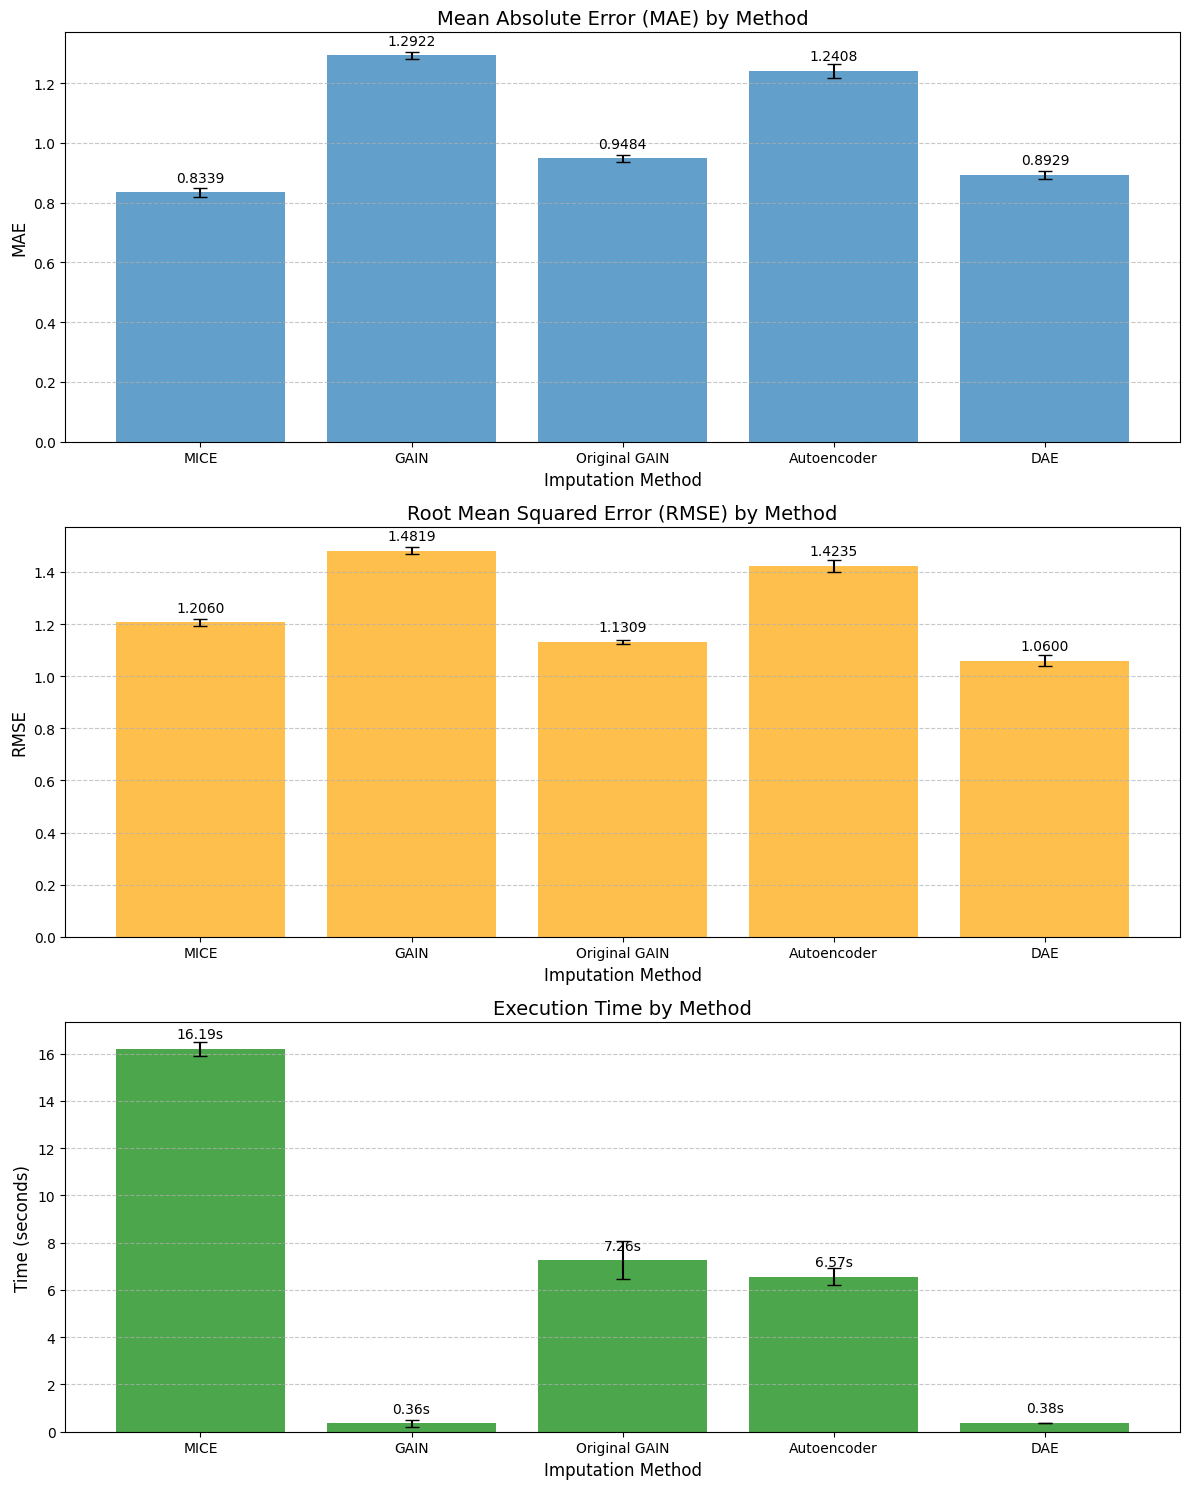


Plotting value distributions...


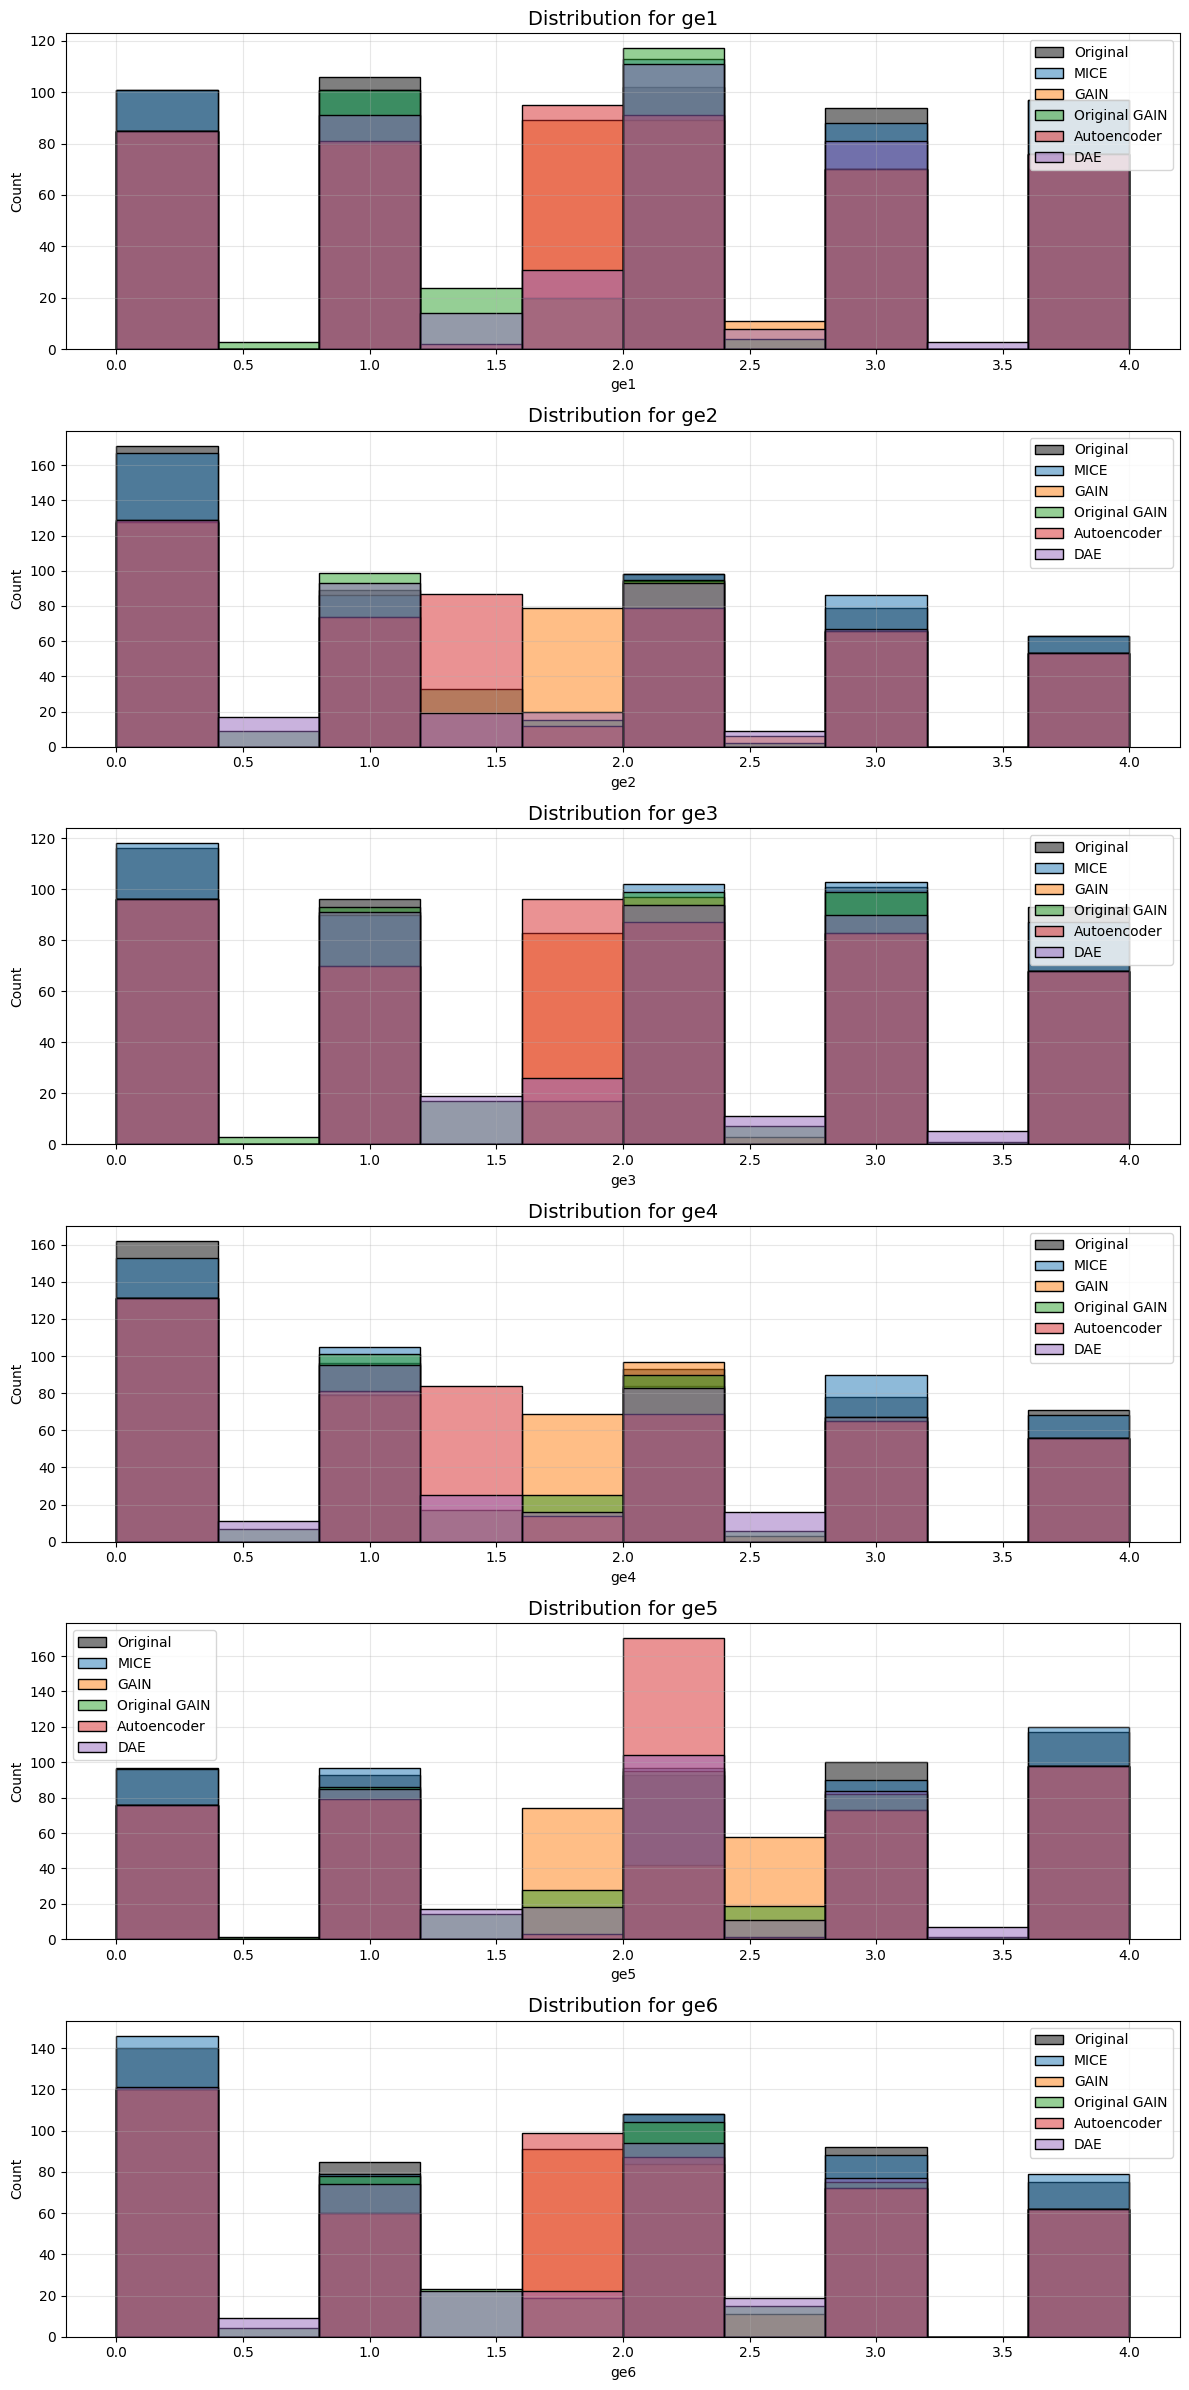


Plotting correlation preservation...


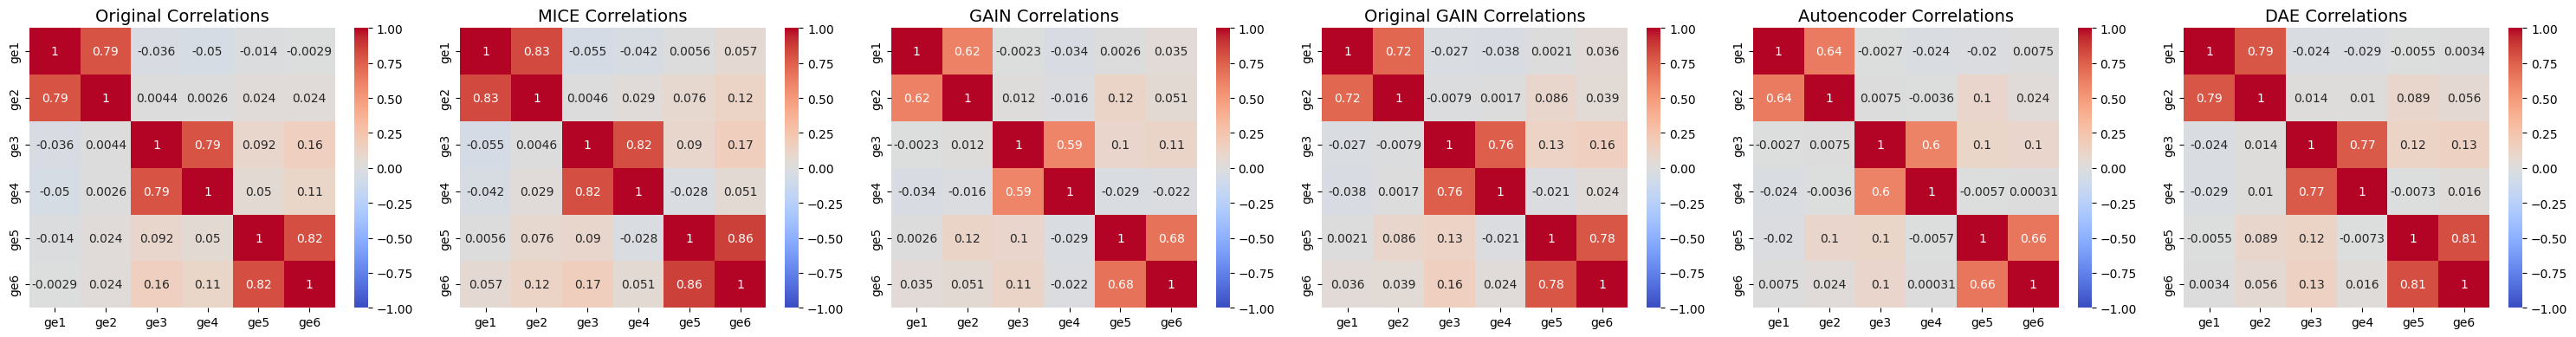

In [39]:

# Assuming all the necessary classes and functions are already imported or defined
# If you're running this as a standalone script, you'll need to import/define:
# - from mice_imputation import apply_mice_imputation  (or implement it)
# - from gain_imputation import apply_gain_imputation
# - from original_gain import apply_original_gain
# - from autoencoder_imputation import apply_autoencoder_imputation
# - from dae_imputation import apply_sklearn_dae_imputation

def create_validation_dataset(df, columns_to_impute, missing_rate=0.2, random_seed=42):
    """
    Create a validation dataset by simulating missingness
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Original data with complete values
    columns_to_impute : list
        List of column names to impute
    missing_rate : float
        Proportion of data to set as missing
    random_seed : int
        Random seed for reproducibility
        
    Returns:
    --------
    df_validation : pandas.DataFrame
        Data with simulated missing values
    masks : dict
        Dictionary of masks for each column (True where values were originally observed)
    original_values : dict
        Dictionary of original values for each column
    """
    np.random.seed(random_seed)
    
    # Create a copy of the original dataframe
    df_validation = df.copy()
    
    # Record the original non-missing values
    original_values = {col: df_validation[col].copy() for col in columns_to_impute}
    masks = {col: df_validation[col].notna() for col in columns_to_impute}  # Where values are non-missing
    
    # Simulate missingness: set missing_rate% of non-missing values to NaN
    for col in columns_to_impute:
        non_missing_indices = df_validation.index[masks[col]]
        n_to_mask = int(missing_rate * len(non_missing_indices))
        indices_to_mask = np.random.choice(non_missing_indices, size=n_to_mask, replace=False)
        df_validation.loc[indices_to_mask, col] = np.nan
    
    return df_validation, masks, original_values


def run_model_comparison(df, columns_to_impute, n_simulations=3, missing_rate=0.2):
    """
    Run and compare multiple imputation methods
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Original data with complete values
    columns_to_impute : list
        List of column names to impute
    n_simulations : int
        Number of simulations to run with different random missingness
    missing_rate : float
        Proportion of data to set as missing
        
    Returns:
    --------
    results : dict
        Dictionary with results for each method
    all_imputed_dfs : dict
        Dictionary with imputed DataFrames from the last simulation
    """
    # Define the methods to compare
    methods = {
        'MICE': apply_mice_imputation,
        'GAIN': apply_gain_imputation,
        'Original GAIN': apply_original_gain,
        'Autoencoder': apply_autoencoder_imputation,
        'DAE': apply_sklearn_dae_imputation
    }
    
    # Initialize results dictionary
    results = {method: {'mae': [], 'rmse': [], 'time': []} for method in methods}
    
    # Store the last set of imputed dataframes
    all_imputed_dfs = {}
    
    # Run multiple simulations
    for sim in range(n_simulations):
        print(f"\n===== Running simulation {sim+1}/{n_simulations} =====")
        
        # Create validation dataset
        validation_df, masks, original_values = create_validation_dataset(
            df, columns_to_impute, missing_rate=missing_rate, random_seed=random.randint(0, 10000)+sim
        )
        
        # Run each imputation method
        for method_name, method_func in methods.items():
            print(f"\nRunning {method_name} imputation...")
            
            try:
                # Time the imputation
                start_time = time.time()
                imputed_df, validation_results = method_func(
                    validation_df, 
                    columns_to_impute,
                    validation_df=validation_df,
                    validation_masks=masks,
                    original_values=original_values
                )
                end_time = time.time()
                execution_time = end_time - start_time
                
                # Store execution time
                results[method_name]['time'].append(execution_time)
                
                # Store the imputed dataframe from the last simulation
                if sim == n_simulations - 1:
                    all_imputed_dfs[method_name] = imputed_df
                
                # Calculate and store metrics
                if validation_results:
                    mae_sum = 0
                    rmse_sum = 0
                    count = 0
                    
                    for col in columns_to_impute:
                        if col in validation_results and 'mae' in validation_results[col]:
                            mae = validation_results[col]['mae']
                            rmse = validation_results[col]['rmse']
                            
                            mae_sum += mae
                            rmse_sum += rmse
                            count += 1
                            
                            print(f"{method_name} - {col} - MAE: {mae:.4f}, RMSE: {rmse:.4f}")
                    
                    if count > 0:
                        results[method_name]['mae'].append(mae_sum / count)
                        results[method_name]['rmse'].append(rmse_sum / count)
                        
                        print(f"{method_name} - Average - MAE: {mae_sum/count:.4f}, RMSE: {rmse_sum/count:.4f}")
                        print(f"{method_name} completed in {execution_time:.2f} seconds")
                    else:
                        print(f"Warning: No valid metrics for {method_name}")
                
            except Exception as e:
                print(f"Error running {method_name}: {e}")
                # If a method fails, add NaN to results
                results[method_name]['mae'].append(np.nan)
                results[method_name]['rmse'].append(np.nan)
                results[method_name]['time'].append(np.nan)
    
    # Calculate averages
    for method in methods:
        # Filter out NaN values before calculating means
        valid_mae = [x for x in results[method]['mae'] if not np.isnan(x)]
        valid_rmse = [x for x in results[method]['rmse'] if not np.isnan(x)]
        valid_time = [x for x in results[method]['time'] if not np.isnan(x)]
        
        if valid_mae:
            results[method]['avg_mae'] = np.mean(valid_mae)
            results[method]['std_mae'] = np.std(valid_mae)
        else:
            results[method]['avg_mae'] = np.nan
            results[method]['std_mae'] = np.nan
            
        if valid_rmse:
            results[method]['avg_rmse'] = np.mean(valid_rmse)
            results[method]['std_rmse'] = np.std(valid_rmse)
        else:
            results[method]['avg_rmse'] = np.nan
            results[method]['std_rmse'] = np.nan
            
        if valid_time:
            results[method]['avg_time'] = np.mean(valid_time)
            results[method]['std_time'] = np.std(valid_time)
        else:
            results[method]['avg_time'] = np.nan
            results[method]['std_time'] = np.nan
    
    return results, all_imputed_dfs

def plot_comparison_results(results):
    """
    Plot comparison results
    
    Parameters:
    -----------
    results : dict
        Dictionary with results from run_model_comparison
    """
    # Prepare data for plotting
    methods = list(results.keys())
    
    # Filter out methods with no valid results
    valid_methods = [m for m in methods if not np.isnan(results[m].get('avg_mae', np.nan))]
    
    if not valid_methods:
        print("No valid methods to plot")
        return
    
    mae_means = [results[m]['avg_mae'] for m in valid_methods]
    mae_stds = [results[m]['std_mae'] for m in valid_methods]
    rmse_means = [results[m]['avg_rmse'] for m in valid_methods]
    rmse_stds = [results[m]['std_rmse'] for m in valid_methods]
    time_means = [results[m]['avg_time'] for m in valid_methods]
    time_stds = [results[m]['std_time'] for m in valid_methods]
    
    # Create figure with three subplots
    fig, axes = plt.subplots(3, 1, figsize=(12, 15))
    
    # Plot MAE
    bars1 = axes[0].bar(valid_methods, mae_means, yerr=mae_stds, capsize=5, alpha=0.7)
    axes[0].set_title('Mean Absolute Error (MAE) by Method', fontsize=14)
    axes[0].set_ylabel('MAE', fontsize=12)
    axes[0].set_xlabel('Imputation Method', fontsize=12)
    axes[0].grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add values on top of bars
    for bar in bars1:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.02 * max(mae_means),
                f'{height:.4f}', ha='center', va='bottom', fontsize=10)
    
    # Plot RMSE
    bars2 = axes[1].bar(valid_methods, rmse_means, yerr=rmse_stds, capsize=5, alpha=0.7, color='orange')
    axes[1].set_title('Root Mean Squared Error (RMSE) by Method', fontsize=14)
    axes[1].set_ylabel('RMSE', fontsize=12)
    axes[1].set_xlabel('Imputation Method', fontsize=12)
    axes[1].grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add values on top of bars
    for bar in bars2:
        height = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.02 * max(rmse_means),
                f'{height:.4f}', ha='center', va='bottom', fontsize=10)
    
    # Plot execution time
    bars3 = axes[2].bar(valid_methods, time_means, yerr=time_stds, capsize=5, alpha=0.7, color='green')
    axes[2].set_title('Execution Time by Method', fontsize=14)
    axes[2].set_ylabel('Time (seconds)', fontsize=12)
    axes[2].set_xlabel('Imputation Method', fontsize=12)
    axes[2].grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add values on top of bars
    for bar in bars3:
        height = bar.get_height()
        axes[2].text(bar.get_x() + bar.get_width()/2., height + 0.02 * max(time_means),
                f'{height:.2f}s', ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.savefig('imputation_methods_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

def plot_value_distributions(df, imputed_dfs, columns_to_impute):
    """
    Plot distributions of original and imputed values
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Original data with complete values
    imputed_dfs : dict
        Dictionary of imputed DataFrames from different methods
    columns_to_impute : list
        List of column names to impute
    """
    n_cols = len(columns_to_impute)
    n_methods = len(imputed_dfs)
    
    # Set up the figure
    fig, axes = plt.subplots(n_cols, 1, figsize=(12, 4 * n_cols))
    if n_cols == 1:
        axes = [axes]
    
    # Plot distributions for each column
    for i, col in enumerate(columns_to_impute):
        ax = axes[i]
        
        # Plot original distribution
        sns.histplot(df[col], ax=ax, label='Original', alpha=0.5, color='black')
        
        # Plot imputed distributions
        colors = plt.cm.tab10.colors
        for j, (method_name, imputed_df) in enumerate(imputed_dfs.items()):
            color = colors[j % len(colors)]
            sns.histplot(imputed_df[col], ax=ax, label=method_name, alpha=0.5, color=color)
        
        ax.set_title(f'Distribution for {col}', fontsize=14)
        ax.legend()
        ax.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('imputation_distributions.png', dpi=300, bbox_inches='tight')
    plt.show()

def plot_correlation_preservation(df, imputed_dfs, columns_to_impute):
    """
    Plot heatmaps showing how well each method preserves correlations
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Original data with complete values
    imputed_dfs : dict
        Dictionary of imputed DataFrames from different methods
    columns_to_impute : list
        List of column names to impute
    """
    # Calculate original correlations
    original_corr = df[columns_to_impute].corr()
    
    # Set up the figure
    n_methods = len(imputed_dfs)
    fig, axes = plt.subplots(1, n_methods + 1, figsize=(5 * (n_methods + 1), 4))
    
    # Plot original correlation
    sns.heatmap(original_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[0])
    axes[0].set_title('Original Correlations', fontsize=14)
    
    # Plot correlations for each imputation method
    for i, (method_name, imputed_df) in enumerate(imputed_dfs.items()):
        imputed_corr = imputed_df[columns_to_impute].corr()
        sns.heatmap(imputed_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[i+1])
        axes[i+1].set_title(f'{method_name} Correlations', fontsize=14)
    
    plt.tight_layout()
    plt.savefig('correlation_preservation.png', dpi=300, bbox_inches='tight')
    plt.show()

def main():
    """
    Main function to run the validation and comparison
    """
    # For demonstration purposes, let's create a synthetic dataset
    # This should be replaced with your actual data
    np.random.seed(random.randint(0, 10000))
    n_samples = 500
    
    # Create synthetic data similar to the ge1-ge6 columns
    ge_cols = [f'ge{i}' for i in range(1, 7)]
    df = pd.DataFrame()
    
    # Create ordinal variables with values 0-4
    for col in ge_cols:
        df[col] = np.random.choice(range(5), size=n_samples)
    
    # Add some correlations between variables to simulate real-world data
    df['ge2'] = (df['ge1'] + np.random.normal(0, 1, n_samples)).clip(0, 4).astype(int)
    df['ge4'] = (df['ge3'] + np.random.normal(0, 1, n_samples)).clip(0, 4).astype(int)
    df['ge6'] = (df['ge5'] + np.random.normal(0, 1, n_samples)).clip(0, 4).astype(int)
    
    # Add other variables that might be predictive
    df['age'] = np.random.normal(60, 10, n_samples).clip(18, 90)
    df['bmi'] = np.random.normal(25, 5, n_samples).clip(15, 45)
    df['gender'] = np.random.choice([0, 1], size=n_samples)
    
    # Define columns to impute
    columns_to_impute = ge_cols
    
    print("Running model comparison...")
    results, all_imputed_dfs = run_model_comparison(
        df=df,
        columns_to_impute=columns_to_impute,
        n_simulations=3,
        missing_rate=0.2
    )
    
    # Print summary results
    print("\n===== Summary Results =====")
    for method, result in results.items():
        if 'avg_mae' in result and not np.isnan(result['avg_mae']):
            print(f"\n{method}:")
            print(f"  MAE: {result['avg_mae']:.4f} ± {result['std_mae']:.4f}")
            print(f"  RMSE: {result['avg_rmse']:.4f} ± {result['std_rmse']:.4f}")
            print(f"  Time: {result['avg_time']:.2f} ± {result['std_time']:.2f} seconds")
    
    # Plot comparison results
    print("\nPlotting comparison results...")
    plot_comparison_results(results)
    
    # Plot value distributions
    print("\nPlotting value distributions...")
    plot_value_distributions(df, all_imputed_dfs, columns_to_impute)
    
    # Plot correlation preservation
    print("\nPlotting correlation preservation...")
    plot_correlation_preservation(df, all_imputed_dfs, columns_to_impute)

if __name__ == "__main__":
    # Check that we have all the necessary functions
    required_functions = [
        "apply_mice_imputation",
        "apply_gain_imputation", 
        "apply_original_gain",
        "apply_autoencoder_imputation", 
        "apply_sklearn_dae_imputation"
    ]
    
    missing_functions = []
    for func in required_functions:
        if func not in globals() and func != "apply_mice_imputation":  # We defined this one in this script
            missing_functions.append(func)
    
    if missing_functions:
        print(f"Warning: The following functions are missing and need to be imported or defined:")
        for func in missing_functions:
            print(f"  - {func}")
        print("\nPlease ensure these functions are available before running the main() function.")
    else:
        main()

### Real data

In [ ]:
def evaluate_real_data_imputation(df, columns_to_impute):
    """
    Evaluate imputation methods on real data with existing missing values
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Your real dataset with missing values
    columns_to_impute : list
        List of column names to impute (ge1-ge6)
        
    Returns:
    --------
    all_imputed_dfs : dict
        Dictionary with imputed DataFrames from each method
    original_df_with_missing : pandas.DataFrame
        Original dataframe with missing values
    execution_times : dict
        Dictionary with execution times for each method
    """
    # Define the methods to compare
    methods = {
        'MICE': apply_mice_imputation,
        'Original GAIN': apply_original_gain,
        'Autoencoder': apply_autoencoder_imputation,
        'DAE': apply_sklearn_dae_imputation
    }
    
    # Initialize dictionaries to store results
    all_imputed_dfs = {}
    execution_times = {}
    distribution_similarity = {method: {} for method in methods}
    
    # Calculate missingness statistics before imputation
    print("Missingness statistics before imputation:")
    for col in columns_to_impute:
        missing_count = df[col].isna().sum()
        missing_percent = (missing_count / len(df)) * 100
        print(f"{col}: {missing_count} missing values ({missing_percent:.2f}%)")
    
    # Save a copy of the original data with missing values
    original_df_with_missing = df.copy()
    
    # Run each imputation method
    for method_name, method_func in methods.items():
        print(f"\nRunning {method_name} imputation...")
        
        try:
            # Time the imputation
            start_time = time.time()
            
            # Apply the imputation method
            imputed_df, _ = method_func(
                df.copy(), 
                columns_to_impute
            )
            
            end_time = time.time()
            execution_time = end_time - start_time
            execution_times[method_name] = execution_time
            
            # Store the imputed dataframe
            all_imputed_dfs[method_name] = imputed_df
            
            # Print execution time
            print(f"{method_name} completed in {execution_time:.2f} seconds")
            
            # Check if imputation was successful (no missing values in imputed columns)
            for col in columns_to_impute:
                remaining_missing = imputed_df[col].isna().sum()
                if remaining_missing > 0:
                    print(f"Warning: {method_name} left {remaining_missing} missing values in {col}")
                
                # Measure distribution similarity between observed and imputed values
                observed_values = original_df_with_missing.loc[original_df_with_missing[col].notna(), col]
                imputed_values = imputed_df.loc[original_df_with_missing[col].isna(), col].dropna()
                
                if len(observed_values) > 0 and len(imputed_values) > 0:
                    # Kolmogorov-Smirnov test for distribution similarity
                    ks_stat, ks_pval = ks_2samp(observed_values, imputed_values)
                    distribution_similarity[method_name][col] = {
                        'ks_stat': ks_stat,
                        'ks_pval': ks_pval
                    }
                    print(f"{method_name} - {col} distribution similarity: KS={ks_stat:.4f}, p={ks_pval:.4f}")
                    #Lower KS statistic and higher p-values indicate better distribution preservation
                    
        except Exception as e:
            print(f"Error running {method_name}: {e}")
    
    return all_imputed_dfs, original_df_with_missing, execution_times, distribution_similarity

#Uses a smaller number of folds (2 by default) to ensure enough data in each fold
def evaluate_with_sparse_validation(df, columns_to_impute, n_folds=2):
    """
    Evaluate imputation methods using cross-validation optimized for sparse data
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Your real dataset with missing values
    columns_to_impute : list
        List of column names to impute
    n_folds : int
        Number of validation folds
        
    Returns:
    --------
    results : dict
        Dictionary with validation results for each method
    """
    # Define the methods to compare
    methods = {
        'MICE': apply_mice_imputation,
        'Original GAIN': apply_original_gain,
        'Autoencoder': apply_autoencoder_imputation,
        'DAE': apply_sklearn_dae_imputation
    }
    
    # Initialize results dictionary
    results = {method: {'mae': [], 'rmse': [], 'time': []} for method in methods}
    
    # For each column, perform validation on non-missing values
    for col in columns_to_impute:
        print(f"\n===== Sparse validation for column: {col} =====")
        
        # Get indices of non-missing values for this column
        observed_indices = df.index[df[col].notna()].tolist()
        n_observed = len(observed_indices)
        
        print(f"Column {col}: {n_observed} observed values ({n_observed/len(df)*100:.2f}%)")
        
        # Skip if too few observations
        if n_observed < max(5, n_folds * 2):
            print(f"Too few observed values for validation. Skipping.")
            continue
        
        # Instead of standard KFold, use a more conservative approach for sparse data
        fold_size = max(5, n_observed // n_folds)  # Ensure at least 5 samples per fold
        
        # Shuffle observed indices
        np.random.seed(random.randint(0, 10000))  # For reproducibility
        shuffled_indices = np.random.permutation(observed_indices)
        
        for fold in range(min(n_folds, n_observed // fold_size)):
            # Select test indices for this fold
            start_idx = fold * fold_size
            end_idx = min(start_idx + fold_size, n_observed)
            test_indices = shuffled_indices[start_idx:end_idx]
            
            print(f"\nFold {fold+1}/{min(n_folds, n_observed // fold_size)} - Testing on {len(test_indices)} samples")
            
            # Create a copy of the original dataframe
            df_fold = df.copy()
            
            # Store original values from test set
            original_values = df_fold.loc[test_indices, col].copy()
            
            # Set test values to NaN (simulating missingness)
            df_fold.loc[test_indices, col] = np.nan
            
            # For each imputation method
            for method_name, method_func in methods.items():
                print(f"Running {method_name}...")
                
                try:
                    # Time the imputation
                    start_time = time.time()
                    
                    # Apply imputation
                    imputed_df, _ = method_func(df_fold.copy(), columns_to_impute)
                    
                    end_time = time.time()
                    execution_time = end_time - start_time
                    
                    # Get imputed values for the test indices
                    imputed_values = imputed_df.loc[test_indices, col]
                    
                    # Check for any still-missing values
                    still_missing = imputed_values.isna().sum()
                    if still_missing > 0:
                        print(f"Warning: {method_name} failed to impute {still_missing}/{len(test_indices)} values")
                        # Use only successfully imputed values for evaluation
                        valid_indices = test_indices.copy()
                        for idx in test_indices:
                            if pd.isna(imputed_df.loc[idx, col]):
                                valid_indices.remove(idx)
                        
                        if not valid_indices:
                            print(f"No valid imputations to evaluate for {method_name}")
                            continue
                            
                        original_values = df.loc[valid_indices, col]
                        imputed_values = imputed_df.loc[valid_indices, col]
                    
                    # Calculate metrics
                    mae = np.mean(np.abs(original_values - imputed_values))
                    rmse = np.sqrt(np.mean((original_values - imputed_values) ** 2))
                    
                    # Store results
                    results[method_name]['mae'].append(mae)
                    results[method_name]['rmse'].append(rmse)
                    results[method_name]['time'].append(execution_time)
                    
                    print(f"{method_name} - MAE: {mae:.4f}, RMSE: {rmse:.4f}, Time: {execution_time:.2f}s")
                    
                except Exception as e:
                    print(f"Error with {method_name}: {e}")
    
    # Calculate average results across all columns and folds
    for method in methods:
        if results[method]['mae']:
            results[method]['avg_mae'] = np.mean(results[method]['mae'])
            results[method]['std_mae'] = np.std(results[method]['mae'])
            results[method]['avg_rmse'] = np.mean(results[method]['rmse'])
            results[method]['std_rmse'] = np.std(results[method]['rmse'])
            results[method]['avg_time'] = np.mean(results[method]['time'])
            results[method]['std_time'] = np.std(results[method]['time'])
        else:
            print(f"No valid results for {method}")
            results[method]['avg_mae'] = np.nan
            results[method]['std_mae'] = np.nan
            results[method]['avg_rmse'] = np.nan
            results[method]['std_rmse'] = np.nan
            results[method]['avg_time'] = np.nan
            results[method]['std_time'] = np.nan
    
    return results

def plot_execution_times(execution_times):
    """
    Plot execution times for each imputation method
    
    Parameters:
    -----------
    execution_times : dict
        Dictionary with execution times for each method
    """
    methods = list(execution_times.keys())
    times = list(execution_times.values())
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(methods, times, alpha=0.7, color='green')
    
    plt.title('Execution Time by Imputation Method', fontsize=14)
    plt.ylabel('Time (seconds)', fontsize=12)
    plt.xlabel('Method', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add values on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.02 * max(times),
                f'{height:.2f}s', ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.savefig('imputation_execution_times.png', dpi=300, bbox_inches='tight')
    plt.show()

def plot_distribution_similarity(distribution_similarity):
    """
    Plot KS statistics for distribution similarity
    
    Parameters:
    -----------
    distribution_similarity : dict
        Dictionary with KS test results
    """
    # Prepare data for plotting
    methods = list(distribution_similarity.keys())
    columns = list(distribution_similarity[methods[0]].keys()) if methods else []
    
    if not methods or not columns:
        print("No distribution similarity data to plot")
        return
    
    # Create a DataFrame for easier plotting
    data = []
    for method in methods:
        for col in columns:
            if col in distribution_similarity[method]:
                data.append({
                    'Method': method,
                    'Column': col,
                    'KS Statistic': distribution_similarity[method][col]['ks_stat'],
                    'p-value': distribution_similarity[method][col]['ks_pval']
                })
    
    if not data:
        print("No valid distribution similarity data to plot")
        return
    
    df_plot = pd.DataFrame(data)
    
    # Plot KS statistics (lower is better - more similar distributions)
    plt.figure(figsize=(12, 8))
    chart = sns.barplot(x='Method', y='KS Statistic', hue='Column', data=df_plot)
    
    plt.title('Distribution Similarity by Method (Lower KS = More Similar)', fontsize=14)
    plt.ylabel('Kolmogorov-Smirnov Statistic', fontsize=12)
    plt.xlabel('Method', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='Column', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.savefig('distribution_similarity.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Plot p-values (higher is better - can't reject null hypothesis of same distribution)
    plt.figure(figsize=(12, 8))
    chart = sns.barplot(x='Method', y='p-value', hue='Column', data=df_plot)
    
    plt.title('Distribution Similarity p-values by Method (Higher = More Similar)', fontsize=14)
    plt.ylabel('p-value', fontsize=12)
    plt.xlabel('Method', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='Column', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.savefig('distribution_pvalues.png', dpi=300, bbox_inches='tight')
    plt.show()

def plot_imputation_histograms(original_df, imputed_dfs, columns_to_impute):
    """
    Plot histograms of imputed values compared to original observed values
    
    Parameters:
    -----------
    original_df : pandas.DataFrame
        Original data with missing values
    imputed_dfs : dict
        Dictionary of imputed DataFrames from different methods
    columns_to_impute : list
        List of column names to impute
    """
    # Number of columns and methods
    n_cols = len(columns_to_impute)
    n_methods = len(imputed_dfs)
    
    # Create figure with subplots
    fig, axes = plt.subplots(n_cols, 1, figsize=(12, 4 * n_cols))
    if n_cols == 1:
        axes = [axes]
    
    # Plot for each column
    for i, col in enumerate(columns_to_impute):
        ax = axes[i]
        
        # Plot original observed distribution
        observed_values = original_df[col].dropna()
        n_observed = len(observed_values)
        
        sns.histplot(observed_values, ax=ax, 
                    label=f'Original (observed, n={n_observed})', 
                    alpha=0.5, color='black', kde=True)
        
        # Plot imputed distributions (only for previously missing values)
        colors = plt.cm.tab10.colors
        for j, (method_name, imputed_df) in enumerate(imputed_dfs.items()):
            # Get just the imputed values (where original was missing)
            missing_mask = original_df[col].isna()
            imputed_values = imputed_df.loc[missing_mask, col].dropna()
            n_imputed = len(imputed_values)
            
            if not imputed_values.empty:
                color = colors[j % len(colors)]
                sns.histplot(imputed_values, ax=ax, 
                            label=f'{method_name} (imputed, n={n_imputed})', 
                            alpha=0.5, color=color, kde=True)
        
        # Add distribution statistics
        if not observed_values.empty:
            obs_mean = observed_values.mean()
            obs_std = observed_values.std()
            ax.axvline(obs_mean, color='black', linestyle='--', alpha=0.7)
            textstr = f'Observed: μ={obs_mean:.2f}, σ={obs_std:.2f}'
            props = dict(boxstyle='round', facecolor='white', alpha=0.5)
            ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
                    verticalalignment='top', bbox=props)
        
        ax.set_title(f'Distribution for {col}', fontsize=14)
        ax.legend()
        ax.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('imputation_histograms.png', dpi=300, bbox_inches='tight')
    plt.show()

def plot_correlation_preservation(original_df, imputed_dfs, columns_to_impute):
    """
    Plot heatmaps showing how well each method preserves correlations
    
    Parameters:
    -----------
    original_df : pandas.DataFrame
        Original data with missing values
    imputed_dfs : dict
        Dictionary of imputed DataFrames from different methods
    columns_to_impute : list
        List of column names to impute
    """
    # Calculate original correlations (using only complete cases)
    # This is important for sparse data - we need a baseline for comparison
    complete_cases = original_df[columns_to_impute].dropna()
    
    if len(complete_cases) < 2:
        print("Not enough complete cases to calculate original correlations")
        # Use pairwise correlations instead
        original_corr = original_df[columns_to_impute].corr(method='pearson')
    else:
        original_corr = complete_cases.corr()
    
    # Set up the figure
    n_methods = len(imputed_dfs)
    fig, axes = plt.subplots(1, n_methods + 1, figsize=(5 * (n_methods + 1), 4))
    
    if n_methods == 0:
        print("No imputed dataframes to plot correlations")
        return
    
    # Plot original correlation
    sns.heatmap(original_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[0])
    axes[0].set_title('Original Correlations', fontsize=14)
    
    # Plot correlations for each imputation method
    for i, (method_name, imputed_df) in enumerate(imputed_dfs.items()):
        imputed_corr = imputed_df[columns_to_impute].corr()
        sns.heatmap(imputed_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[i+1])
        axes[i+1].set_title(f'{method_name} Correlations', fontsize=14)
    
    plt.tight_layout()
    plt.savefig('correlation_preservation.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Calculate and plot correlation differences
    print("Calculating correlation differences...")
    correlation_diffs = {}
    
    for method_name, imputed_df in imputed_dfs.items():
        imputed_corr = imputed_df[columns_to_impute].corr()
        # Calculate absolute differences between original and imputed correlations
        diff_matrix = np.abs(original_corr - imputed_corr)
        correlation_diffs[method_name] = diff_matrix
    
    # Plot correlation differences (lower is better - less difference from original)
    fig, axes = plt.subplots(1, n_methods, figsize=(5 * n_methods, 4))
    
    if n_methods == 1:
        axes = [axes]
    
    for i, (method_name, diff_matrix) in enumerate(correlation_diffs.items()):
        sns.heatmap(diff_matrix, annot=True, cmap='YlOrRd', vmin=0, vmax=1, ax=axes[i])
        axes[i].set_title(f'{method_name} Correlation Differences', fontsize=14)
        
        # Calculate and display average difference
        avg_diff = np.mean(diff_matrix.values)
        axes[i].text(0.5, -0.1, f'Avg Diff: {avg_diff:.4f}', 
                    horizontalalignment='center', transform=axes[i].transAxes)
    
    plt.tight_layout()
    plt.savefig('correlation_differences.png', dpi=300, bbox_inches='tight')
    plt.show()

def plot_validation_results(validation_results):
    """
    Plot validation results
    
    Parameters:
    -----------
    validation_results : dict
        Dictionary with validation results
    """
    # Prepare data for plotting
    methods = [m for m in validation_results.keys() 
              if 'avg_mae' in validation_results[m] and not np.isnan(validation_results[m]['avg_mae'])]
    
    if not methods:
        print("No valid validation results to plot")
        return
    
    mae_means = [validation_results[m]['avg_mae'] for m in methods]
    mae_stds = [validation_results[m]['std_mae'] for m in methods]
    rmse_means = [validation_results[m]['avg_rmse'] for m in methods]
    rmse_stds = [validation_results[m]['std_rmse'] for m in methods]
    time_means = [validation_results[m]['avg_time'] for m in methods]
    time_stds = [validation_results[m]['std_time'] for m in methods]
    
    # Create figure with three subplots
    fig, axes = plt.subplots(3, 1, figsize=(12, 15))
    
    # Plot MAE
    bars1 = axes[0].bar(methods, mae_means, yerr=mae_stds, capsize=5, alpha=0.7)
    axes[0].set_title('Mean Absolute Error (MAE) by Method', fontsize=14)
    axes[0].set_ylabel('MAE', fontsize=12)
    axes[0].set_xlabel('Imputation Method', fontsize=12)
    axes[0].grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add values on top of bars
    for bar in bars1:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.02 * max(mae_means),
                f'{height:.4f}', ha='center', va='bottom', fontsize=10)
    
    # Plot RMSE
    bars2 = axes[1].bar(methods, rmse_means, yerr=rmse_stds, capsize=5, alpha=0.7, color='orange')
    axes[1].set_title('Root Mean Squared Error (RMSE) by Method', fontsize=14)
    axes[1].set_ylabel('RMSE', fontsize=12)
    axes[1].set_xlabel('Imputation Method', fontsize=12)
    axes[1].grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add values on top of bars
    for bar in bars2:
        height = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.02 * max(rmse_means),
                f'{height:.4f}', ha='center', va='bottom', fontsize=10)
    
    # Plot execution time
    bars3 = axes[2].bar(methods, time_means, yerr=time_stds, capsize=5, alpha=0.7, color='green')
    axes[2].set_title('Execution Time by Method', fontsize=14)
    axes[2].set_ylabel('Time (seconds)', fontsize=12)
    axes[2].set_xlabel('Imputation Method', fontsize=12)
    axes[2].grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add values on top of bars
    for bar in bars3:
        height = bar.get_height()
        axes[2].text(bar.get_x() + bar.get_width()/2., height + 0.02 * max(time_means),
                f'{height:.2f}s', ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.savefig('validation_results.png', dpi=300, bbox_inches='tight')
    plt.show()

def create_summary_dataframe(imputed_dfs, validation_results, distribution_similarity, execution_times):
    """
    Create a summary dataframe of all results
    
    Parameters:
    -----------
    imputed_dfs : dict
        Dictionary of imputed DataFrames
    validation_results : dict
        Dictionary with validation results
    distribution_similarity : dict
        Dictionary with distribution similarity results
    execution_times : dict
        Dictionary with execution times
        
    Returns:
    --------
    summary_df : pandas.DataFrame
        DataFrame with summary of all results
    """
    # Get list of methods
    methods = list(imputed_dfs.keys())
    
    # Initialize summary data
    summary_data = []
    
    for method in methods:
        method_summary = {'Method': method}
        
        # Add validation metrics if available
        if method in validation_results and 'avg_mae' in validation_results[method]:
            method_summary['MAE'] = validation_results[method]['avg_mae']
            method_summary['RMSE'] = validation_results[method]['avg_rmse']
        else:
            method_summary['MAE'] = np.nan
            method_summary['RMSE'] = np.nan
        
        # Add execution time
        if method in execution_times:
            method_summary['Time (s)'] = execution_times[method]
        else:
            method_summary['Time (s)'] = np.nan
        
        # Add average distribution similarity metrics if available
        if method in distribution_similarity:
            ks_stats = []
            ks_pvals = []
            
            for col, results in distribution_similarity[method].items():
                if 'ks_stat' in results:
                    ks_stats.append(results['ks_stat'])
                if 'ks_pval' in results:
                    ks_pvals.append(results['ks_pval'])
            
            if ks_stats:
                method_summary['Avg KS Stat'] = np.mean(ks_stats)
            else:
                method_summary['Avg KS Stat'] = np.nan
                
            if ks_pvals:
                method_summary['Avg KS p-value'] = np.mean(ks_pvals)
            else:
                method_summary['Avg KS p-value'] = np.nan
        else:
            method_summary['Avg KS Stat'] = np.nan
            method_summary['Avg KS p-value'] = np.nan
        
        summary_data.append(method_summary)
    
    # Create DataFrame
    summary_df = pd.DataFrame(summary_data)
    
    # Add ranks for each metric (1 is best)
    for metric in ['MAE', 'RMSE', 'Time (s)', 'Avg KS Stat']:
        if metric == 'Avg KS Stat' or metric == 'Time (s)':
            # Lower is better for these metrics
            summary_df[f'{metric} Rank'] = summary_df[metric].rank()
        else:
            # Higher is better for p-value
            summary_df[f'{metric} Rank'] = summary_df[metric].rank(ascending=False)
    
    # Add average rank
    rank_columns = [col for col in summary_df.columns if 'Rank' in col]
    if rank_columns:
        summary_df['Average Rank'] = summary_df[rank_columns].mean(axis=1)
        summary_df = summary_df.sort_values('Average Rank')
    
    return summary_df

def main_real_data(df, columns_to_impute=['ge1', 'ge2', 'ge3', 'ge4', 'ge5', 'ge6']):
    """
    Main function to run imputation comparison on real data with high missingness
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Your real dataset with missing values
    columns_to_impute : list
        List of column names to impute (default: ge1-ge6)
        
    Returns:
    --------
    imputed_dfs : dict
        Dictionary of imputed DataFrames from each method
    summary_df : pandas.DataFrame
        DataFrame with summary of all results
    """
    print("===== Analyzing Dataset =====")
    print(f"Dataset shape: {df.shape}")
    
    # Show basic statistics of the dataset
    print("\nMissing value counts:")
    missing_counts = df[columns_to_impute].isna().sum()
    missing_percents = (missing_counts / len(df)) * 100
    for col, count, percent in zip(columns_to_impute, missing_counts, missing_percents):
        print(f"{col}: {count} missing values ({percent:.2f}%)")
    
    # Print observed values statistics
    print("\nObserved values per column:")
    for i, col in enumerate(columns_to_impute):
        observed = df[col].dropna()
        n_observed = len(observed)
        if n_observed > 0:
            print(f"{col}: {n_observed} observed values ({100-missing_percents[i]:.2f}%)")
            print(f"  Range: {observed.min()} to {observed.max()}")
            print(f"  Mean: {observed.mean():.4f}, Std: {observed.std():.4f}")
            print(f"  Unique values: {observed.nunique()} ({observed.nunique()/n_observed*100:.1f}% unique)")
        else:
            print(f"{col}: No observed values")
    
    print("\n===== Running imputation on real data =====")
    imputed_dfs, original_df, execution_times, distribution_similarity = evaluate_real_data_imputation(
        df, columns_to_impute
    )
    
    # Plot execution times
    print("\nPlotting execution times...")
    plot_execution_times(execution_times)
    
    # Plot distribution similarity
    print("\nPlotting distribution similarity...")
    plot_distribution_similarity(distribution_similarity)
    
    # Plot histograms of imputed values
    print("\nPlotting imputation histograms...")
    plot_imputation_histograms(original_df, imputed_dfs, columns_to_impute)
    
    # Plot correlation preservation
    print("\nPlotting correlation preservation...")
    plot_correlation_preservation(original_df, imputed_dfs, columns_to_impute)
    
    print("\n===== Running sparse validation =====")
    validation_results = evaluate_with_sparse_validation(df, columns_to_impute, n_folds=3)
    
    # Plot validation results
    print("\nPlotting validation results...")
    plot_validation_results(validation_results)
    
    # Create summary dataframe
    print("\nCreating summary of results...")
    summary_df = create_summary_dataframe(
        imputed_dfs, 
        validation_results, 
        distribution_similarity, 
        execution_times
    )
    
    # Print summary of results
    print("\n===== Summary of Results =====")
    print(summary_df.to_string())
    
    # Save summary to CSV
    summary_df.to_csv('imputation_summary.csv', index=False)
    
    # Print recommended method based on average rank
    if 'Average Rank' in summary_df.columns:
        best_method = summary_df.iloc[0]['Method']
        print(f"\nRecommended imputation method: {best_method}")
    
    return imputed_dfs, summary_df

# Example usage
if __name__ == "__main__":
    # Load your real dataset with missing values here
    # df = pd.read_csv('your_dataset.csv')
    
    # Define columns to impute
    columns_to_impute = ['ge1', 'ge2', 'ge3', 'ge4', 'ge5', 'ge6']
    
    # Run the analysis
    imputed_dfs, summary_df = main_real_data(df, columns_to_impute)
    
    # Example of how to save the best imputed dataset
    if not summary_df.empty:
        best_method = summary_df.iloc[0]['Method']
        print(f"\nSaving imputed dataset from {best_method}...")
        imputed_dfs[best_method].to_csv(f'imputed_data_{best_method}.csv', index=False)

===== Analyzing Dataset =====
Dataset shape: (18187, 65)

Missing value counts:
ge1: 15454 missing values (84.97%)
ge2: 15497 missing values (85.21%)
ge3: 15543 missing values (85.46%)
ge4: 15472 missing values (85.07%)
ge5: 15482 missing values (85.13%)
ge6: 15469 missing values (85.06%)

Observed values per column:
ge1: 2733 observed values (15.03%)
  Range: 0.0 to 4.0
  Mean: 1.0893, Std: 1.1332
  Unique values: 5 (0.2% unique)
ge2: 2690 observed values (14.79%)
  Range: 0.0 to 4.0
  Mean: 2.4647, Std: 1.1927
  Unique values: 5 (0.2% unique)
ge3: 2644 observed values (14.54%)
  Range: 0.0 to 4.0
  Mean: 0.5843, Std: 1.0138
  Unique values: 5 (0.2% unique)
ge4: 2715 observed values (14.93%)
  Range: 0.0 to 4.0
  Mean: 1.2891, Std: 1.2363
  Unique values: 5 (0.2% unique)
ge5: 2705 observed values (14.87%)
  Range: 0.0 to 4.0
  Mean: 0.9567, Std: 1.1935
  Unique values: 5 (0.2% unique)
ge6: 2718 observed values (14.94%)
  Range: 0.0 to 4.0
  Mean: 1.5839, Std: 1.2910
  Unique values: 5

MICE Imputation: 100%|██████████| 5/5 [00:31<00:00,  6.33s/it]


MICE completed in 31.76 seconds
MICE - ge1 distribution similarity: KS=0.4182, p=0.0000
MICE - ge2 distribution similarity: KS=0.5261, p=0.0000
MICE - ge3 distribution similarity: KS=0.6244, p=0.0000
MICE - ge4 distribution similarity: KS=0.5207, p=0.0000
MICE - ge5 distribution similarity: KS=0.6050, p=0.0000
MICE - ge6 distribution similarity: KS=0.4982, p=0.0000

Running Original GAIN imputation...
Auto-detected categorical column: overall_primary_tumour
Auto-detected categorical column: overall_regional_ln
Auto-detected categorical column: overall_distant_metastasis
Auto-detected categorical column: path_esoph_primtumour
Auto-detected categorical column: path_esoph_regionalln
Auto-detected categorical column: path_esoph_distantmetast


 18%|█▊        | 541/3000 [00:01<00:06, 378.22it/s]

Iteration: 500/3000
Generator Loss: 2.1723
Discriminator Loss: 0.5294
Train MSE Loss: 0.1104
Train Cross-Entropy Loss: -9.7644
Test MSE Loss: 0.0610
Test Cross-Entropy Loss: -0.0000



 36%|███▌      | 1073/3000 [00:04<00:05, 373.47it/s]

Iteration: 1000/3000
Generator Loss: 2.5429
Discriminator Loss: 0.5230
Train MSE Loss: 0.1551
Train Cross-Entropy Loss: -10.0022
Test MSE Loss: 0.1190
Test Cross-Entropy Loss: -0.0000



 52%|█████▏    | 1574/3000 [00:05<00:03, 391.18it/s]

Iteration: 1500/3000
Generator Loss: 3.2400
Discriminator Loss: 0.2529
Train MSE Loss: 0.1280
Train Cross-Entropy Loss: -9.8719
Test MSE Loss: 0.1599
Test Cross-Entropy Loss: -0.0000



 68%|██████▊   | 2052/3000 [00:09<00:05, 173.55it/s]

Iteration: 2000/3000
Generator Loss: 3.9638
Discriminator Loss: 0.1712
Train MSE Loss: 0.1716
Train Cross-Entropy Loss: -10.0037
Test MSE Loss: 0.1493
Test Cross-Entropy Loss: -0.0000



 85%|████████▌ | 2564/3000 [00:10<00:01, 394.93it/s]

Iteration: 2500/3000
Generator Loss: 4.6921
Discriminator Loss: 0.1166
Train MSE Loss: 0.1427
Train Cross-Entropy Loss: -9.7344
Test MSE Loss: 0.1762
Test Cross-Entropy Loss: -0.0000



100%|██████████| 3000/3000 [00:11<00:00, 250.92it/s]


Iteration: 3000/3000
Generator Loss: 5.5626
Discriminator Loss: 0.1159
Train MSE Loss: 0.1274
Train Cross-Entropy Loss: -9.4207
Test MSE Loss: 0.1445
Test Cross-Entropy Loss: -0.0000

Detected string column: overall_primary_tumour
Detected string column: overall_regional_ln
Detected string column: overall_distant_metastasis
Detected string column: path_esoph_primtumour
Detected string column: path_esoph_regionalln
Detected string column: path_esoph_distantmetast
Original GAIN completed in 13.58 seconds
Original GAIN - ge1 distribution similarity: KS=0.6019, p=0.0000
Original GAIN - ge2 distribution similarity: KS=0.6806, p=0.0000
Original GAIN - ge3 distribution similarity: KS=0.6785, p=0.0000
Original GAIN - ge4 distribution similarity: KS=0.7631, p=0.0000
Original GAIN - ge5 distribution similarity: KS=0.6540, p=0.0000
Original GAIN - ge6 distribution similarity: KS=0.6768, p=0.0000

Running Autoencoder imputation...
Training autoencoder imputation models...


Training model for ge6:  83%|████████▎ | 5/6 [02:57<00:37, 37.90s/it]

In [22]:
imputed_dfs

{'MICE':          id   redcap_event_name  age_diagnosis gender overall_primary_tumour  \
 0         1      baseline_arm_1            NaN    1.0                    nan   
 1         1                 nan            NaN    NaN                    nan   
 2         1                 nan            NaN    NaN                    nan   
 3         1                 nan            NaN    NaN                    nan   
 4         1                 nan            NaN    NaN                    nan   
 ...     ...                 ...            ...    ...                    ...   
 18182  1770  preoperative_arm_1            NaN    NaN                    nan   
 18183  1770  preoperative_arm_1            NaN    NaN                    nan   
 18184  1770  preoperative_arm_1            NaN    NaN                    nan   
 18185  1770      baseline_arm_1            NaN    1.0                    nan   
 18186  1770       surgery_arm_1            NaN    NaN                    nan   
 
       overall_reg

In [23]:
summary_df

,Method,MAE,RMSE,Time (s),Avg KS Stat,Avg KS p-value,MAE Rank,RMSE Rank,Time (s) Rank,Avg KS Stat Rank,Average Rank
1,GAIN,1.154310,1.316881,0.580499,0.789512,0.0,1.0,2.0,1.0,5.0,2.25
2,Original GAIN,1.041114,1.391916,9.689930,0.726424,0.0,2.0,1.0,3.0,4.0,2.50
4,DAE,0.966525,1.177642,3.644855,0.590214,0.0,3.0,3.0,2.0,3.0,2.75
0,MICE,0.658630,1.019815,27.133862,0.532098,0.0,5.0,5.0,4.0,1.0,3.75
3,Autoencoder,0.842492,1.082844,173.436089,0.588847,0.0,4.0,4.0,5.0,2.0,3.75
